<a href="https://colab.research.google.com/github/Carol-ACDR/ManutencaoPreditiva-Projeto/blob/main/ManuPred-Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

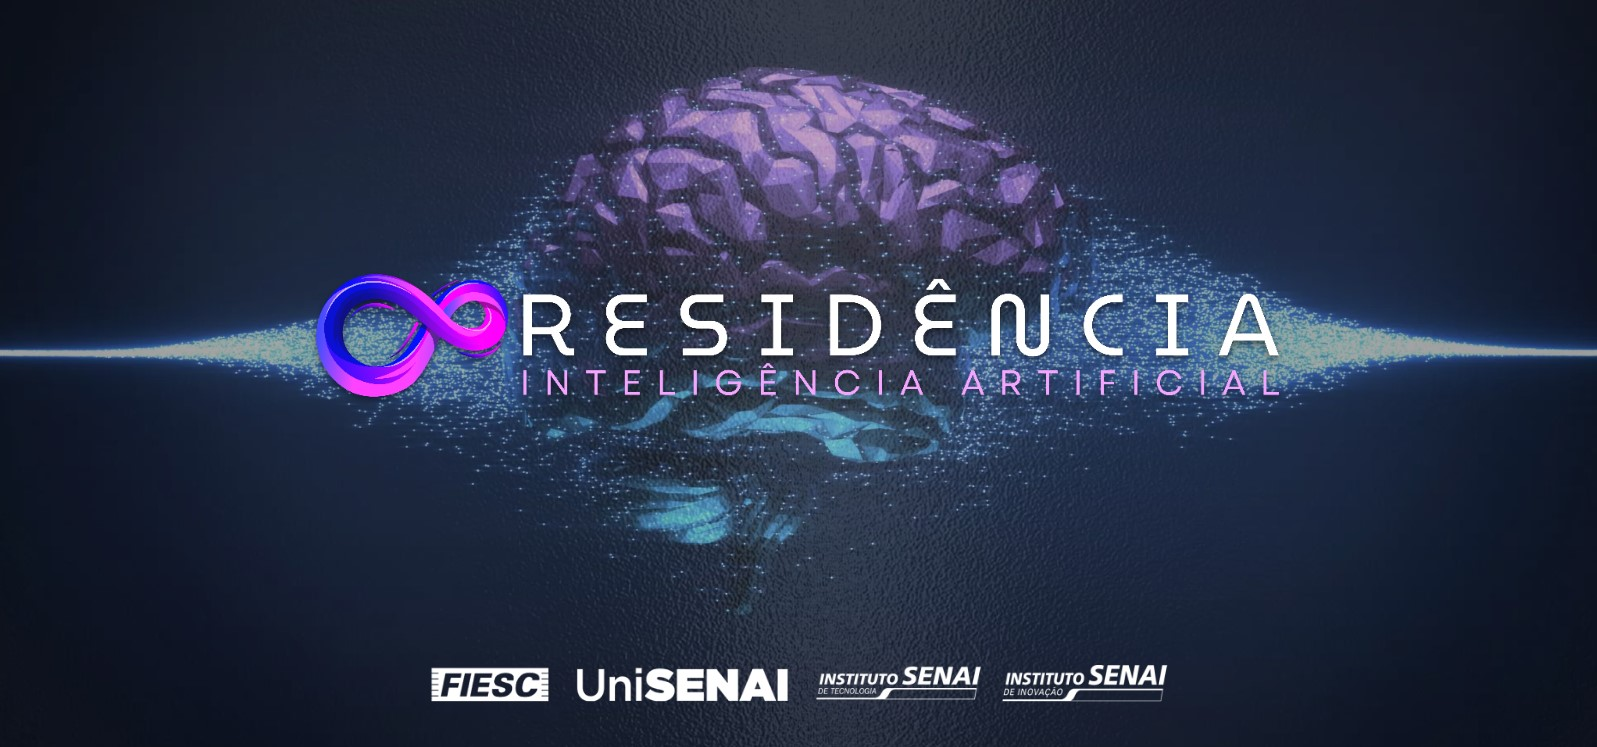

INTRODUÇÃO



---

**Curso**: Bootcamp Ciência de Dados e Inteligência Artificial

**Projeto Final**: Sistema Inteligente de Manutenção Preditiva

**Aluhna**: Ana Carolina Dutra Ramos

**Data**: 01/09/2025


---



Com a crescente tendência à smartificação, ou seja, à utilização de sistemas e sensores inteligentes em ferramentas e dispositivos eletrônicos, cresce diariamente a quantidade de dados geridos e armazenados nos bancos de dados. No entanto, muitas vezes essa vasta quantidade de informações se perde devido à desorganização e a ruídos.

Em contraponto a esse cenário, surgem técnicas de aprendizado de máquina, associadas à inteligência artificial, que estão em contínuo aperfeiçoamento para facilitar o entendimento, o fluxo e a organização desses dados.

Uma dessas técnicas, que é o foco deste projeto, é a manutenção preditiva, voltada a prever e/ou classificar possíveis problemas com base nas condições em que uma ferramenta se encontra. Isso permite que as melhores medidas sejam tomadas no momento correto, minimizando custos desnecessários e maximizando o tempo de uso dos equipamentos.

Este projeto concentra-se na análise e exploração de dados teóricos de uma empresa, além do desenvolvimento de um modelo preditivo capaz de identificar falhas em máquinas e sugerir quais falhas ocorreram. Para isso, é utilizado um dataset teórico fornecido, que simula um conjunto de medições de dispositivos IoT.

Essa exploração é de suma importância para compreender o comportamento das máquinas e as condições em que se encontram. Além disso, entender os fatores que levam a cada erro pode ajudar a prevenir problemas futuros.

O objetivo do modelo é identificar se ocorrerão falhas e determinar a falha específica. Supõe-se, em primeira hipótese, que as informações contidas no dataset se relacionam de maneira consistente, de modo a apontar para uma falha. Em um segundo momento, caso essa hipótese seja confirmada, deve-se analisar se cada falha pode ser detectada em condições específicas.

Quanto a natureza dos dados, aqui está a relação:

| Campo                        | Descrição                                                                                     |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| id                            | Identificador das amostras do banco                                                          |
| id_produto                    | Identificador único do produto. Combinação da variável Tipo e um número de identificação      |
| tipo                          | Tipo de produto/máquina (L/M/H)                                                             |
| temperatura_ar                | Temperatura do ar no ambiente (K)                                                            |
| temperatura_processo          | Temperatura do processo (K)                                                                  |
| umidade_relativa              | Umidade relativa do ar (%)                                                                    |
| velocidade_rotacional         | Velocidade rotacional da máquina em rotações por minuto (RPM)                                 |
| torque                        | Torque da máquina em Nm                                                                       |
| desgaste_da_ferramenta        | Duração do uso da ferramenta em minutos                                                      |
| falha_maquina                 | Indica se houve falha na máquina (1) ou não (0)                                              |
| FDF (Falha Desgaste Ferramenta)| Indica se houve falha por desgaste da ferramenta (1) ou não (0)                             |
| FDC (Falha Dissipacao Calor)  | Indica se houve falha por dissipação de calor (1) ou não (0)                                 |
| FP (Falha Potencia)           | Indica se houve falha por potência (1) ou não (0)                                            |
| FTE (Falha Tensao Excessiva)  | Indica se houve falha por tensão excessiva (1) ou não (0)                                    |
| FA (Falha Aleatoria)          | Indica se houve falha aleatória (1) ou não (0)                                              |


# Importação

In [99]:
# importação das bibliotecas necessarias.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC


np.random.seed(42)

In [100]:
Bootcamp = pd.read_csv('bootcamp_train.csv', sep=',')
Bootcamp

id id_produto tipo  temperatura_ar  temperatura_processo  \
0          0     L56434    L           298.3                 309.1   
1          1     L48741    L           298.2                 308.4   
2          2     L48850    L           298.2                 307.8   
3          3     M20947    M           300.9                 310.8   
4          4     L53849    L           -36.0                 310.5   
...      ...        ...  ...             ...                   ...   
35255  35255     L54709    L           300.1                 311.4   
35256  35256     L54735    L           300.4                 311.3   
35257  35257     L54275    L           300.6                 -38.0   
35258  35258     M18165    M           301.3                 310.4   
35259  35259     L53432    L           300.8                 310.3   

       umidade_relativa  velocidade_rotacional  torque  \
0                  90.0                 1616.0    31.1   
1                  90.0                 1388.0    53.8   
2                  90.0                 1528.0    31.1   
3                  90.0                 1599.0    33.0   
4                  90.0                 1571.0    33.9   
...                 ...                    ...     ...   
35255              90.0                 1634.0    34.2   
35256              90.0                 1597.0    36.2   
35257              90.0                 1485.0    35.8   
35258              90.0                 1577.0    37.3   
35259              90.0                 1438.0    44.1   

       desgaste_da_ferramenta falha_maquina FDF (Falha Desgaste Ferramenta)  \
0                       195.0           não                           False   
1                       137.0           Não                           False   
2                         NaN           Não                               N   
3                         7.0           não                           False   
4                         NaN           não                               N   
...                       ...           ...                             ...   
35255                    45.0           não                           False   
35256                   112.0             0                           False   
35257                    19.0           Não                           False   
35258                    43.0           não                           False   
35259                   198.0           Não                           False   

      FDC (Falha Dissipacao Calor) FP (Falha Potencia)  \
0                            False                 Não   
1                            False                 Não   
2                            False                 Não   
3                            False                 Não   
4                            False                 não   
...                            ...                 ...   
35255                        False                 não   
35256                        False                 Não   
35257                        False                 Não   
35258                        False                 não   
35259                        False                 não   

       FTE (Falha Tensao Excessiva) FA (Falha Aleatoria)  
0                             False                  Não  
1                             False                  Não  
2                             False                  Não  
3                             False                  não  
4                             False                  Não  
...                             ...                  ...  
35255                         False                  Não  
35256                         False                  Não  
35257                         False                  Não  
35258                         False                  não  
35259                         False                  Não  

[35260 rows x 15 columns]

# Visualização e limpeza

In [3]:
Bootcamp.shape

(35260, 15)

In [4]:
Bootcamp.dtypes

id                                   int64
id_produto                          object
tipo                                object
temperatura_ar                     float64
temperatura_processo               float64
umidade_relativa                   float64
velocidade_rotacional              float64
torque                             float64
desgaste_da_ferramenta             float64
falha_maquina                       object
FDF (Falha Desgaste Ferramenta)     object
FDC (Falha Dissipacao Calor)        object
FP (Falha Potencia)                 object
FTE (Falha Tensao Excessiva)          bool
FA (Falha Aleatoria)                object
dtype: object

Nessas primeiras observações, já surgem questionamentos quanto à organização dos dados: as colunas falha_maquina, FDF, FDC, FP, FTE e FA deveriam ser, dado o contexto, valores booleanos. Além disso, são de extrema importância, pois formam nosso valor alvo.

As colunas id e id_produto funcionam como identificadores. A coluna id representa uma entrada única na base de dados, enquanto id_produto parece estar mais relacionada ao produto em si. Em uma primeira análise, vamos verificar se existem duplicatas, caso sejam encontradas, elas poderão ser excluídas.

In [101]:
Bootcamp[Bootcamp.duplicated(keep=False)]

Empty DataFrame
Columns: [id, id_produto, tipo, temperatura_ar, temperatura_processo, umidade_relativa, velocidade_rotacional, torque, desgaste_da_ferramenta, falha_maquina, FDF (Falha Desgaste Ferramenta), FDC (Falha Dissipacao Calor), FP (Falha Potencia), FTE (Falha Tensao Excessiva), FA (Falha Aleatoria)]
Index: []

In [102]:
Bootcamp.drop(columns=['id'], inplace=True)
Bootcamp[Bootcamp.duplicated(keep=False)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
9861      L57141    L           298.2                 307.9              90.0   
14120     H35550    H           300.9                 310.8              90.0   
17853     L57141    L           298.2                 307.9              90.0   
23172     L51377    L           302.4                 311.0              90.0   
26445     H35550    H           300.9                 310.8              90.0   
28816     L51377    L           302.4                 311.0              90.0   
32811     L53271    L           300.9                 310.7              90.0   
34689     L53271    L           300.9                 310.7              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta falha_maquina  \
9861                  1399.0    54.9                   137.0           não   
14120                 1390.0    43.7                   131.0           Não   
17853                 1399.0    54.9                   137.0           não   
23172                 1573.0    36.6                   193.0           não   
26445                 1390.0    43.7                   131.0           Não   
28816                 1573.0    36.6                   193.0           não   
32811                 1412.0    57.5                     NaN           Não   
34689                 1412.0    57.5                     NaN           Não   

      FDF (Falha Desgaste Ferramenta) FDC (Falha Dissipacao Calor)  \
9861                            False                        False   
14120                           False                        False   
17853                           False                        False   
23172                           False                        False   
26445                           False                        False   
28816                           False                        False   
32811                           False                        False   
34689                           False                        False   

      FP (Falha Potencia)  FTE (Falha Tensao Excessiva) FA (Falha Aleatoria)  
9861                  Não                         False                  Não  
14120                 não                         False                  não  
17853                 Não                         False                  Não  
23172                 Não                         False                  não  
26445                 não                         False                  não  
28816                 Não                         False                  não  
32811                 não                         False                  não  
34689                 não                         False                  não

Existem colunas duplicadas no dataset e, para evitar enviesar as análises, elas serão removidas.

In [103]:
Bootcamp.drop_duplicates(keep='first', inplace=True)

Com as duplicatas removidas, passamos agora ao próximo ponto: a consistência dos valores alvo.

## Correção de variáveis alvo

In [104]:
Bootcamp["falha_maquina"].value_counts()

falha_maquina
Não    21924
não    11301
N        691
0        678
Sim      420
sim      217
y         13
1         12
Name: count, dtype: int64

In [105]:
Bootcamp["FDF (Falha Desgaste Ferramenta)"].value_counts()

FDF (Falha Desgaste Ferramenta)
False    33725
N          702
0          688
True        70
-           70
1            1
Name: count, dtype: int64

In [106]:
Bootcamp["FDC (Falha Dissipacao Calor)"].value_counts()

FDC (Falha Dissipacao Calor)
False    33645
nao        700
0          686
True       217
y            4
1            4
Name: count, dtype: int64

In [107]:
Bootcamp["FP (Falha Potencia)"].value_counts()

FP (Falha Potencia)
Não    22280
não    11460
N        702
0        688
Sim       81
sim       41
1          2
y          2
Name: count, dtype: int64

In [108]:
Bootcamp["FTE (Falha Tensao Excessiva)"].value_counts()

FTE (Falha Tensao Excessiva)
False    35086
True       170
Name: count, dtype: int64

In [109]:
Bootcamp["FA (Falha Aleatoria)"].value_counts()

FA (Falha Aleatoria)
Não    22701
não    11709
0        702
-         70
Sim       49
sim       24
1          1
Name: count, dtype: int64

Como existem várias formas de representar valores booleanos, padronizaremos da seguinte maneira: (sim, Sim, 1, true) será convertido para True e (não, Não, 0, false) será convertido para False.

Quanto ao "-", apesar de ser associado com False em alguns contexto, isso não é válido para todos, então é necessário analisar-lo. Tecnicamente, sempre que houver uma falha, a coluna falha_maquina deve ser True, e a coluna correspondente à falha específica também deve indicar True.

Então, se falha_maquina for True e nenhuma outra falha estiver marcada como True, a coluna com "-" deve ser considerada True. Em qualquer outra circunstância, ela deve ser considerada False.

In [110]:
lis = ["falha_maquina","FDF (Falha Desgaste Ferramenta)","FDC (Falha Dissipacao Calor)","FP (Falha Potencia)","FA (Falha Aleatoria)"]
def correcaobinaria(x):
  Bootcamp[x] = (Bootcamp[x].replace({
              1: True,
            "1": True,
          "sim": True,
          "Sim": True,
          "y": True,
          "True": True,
          "False": False,
          "Não": False,
          "não": False,
          "nao": False,
          "N": False,
          "0": False,
            0: False
      })
)

In [111]:
for i in lis:
  correcaobinaria(i)
Bootcamp

/tmp/ipython-input-3973932872.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Bootcamp[x] = (Bootcamp[x].replace({


id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
0         L56434    L           298.3                 309.1              90.0   
1         L48741    L           298.2                 308.4              90.0   
2         L48850    L           298.2                 307.8              90.0   
3         M20947    M           300.9                 310.8              90.0   
4         L53849    L           -36.0                 310.5              90.0   
...          ...  ...             ...                   ...               ...   
35255     L54709    L           300.1                 311.4              90.0   
35256     L54735    L           300.4                 311.3              90.0   
35257     L54275    L           300.6                 -38.0              90.0   
35258     M18165    M           301.3                 310.4              90.0   
35259     L53432    L           300.8                 310.3              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
0                     1616.0    31.1                   195.0          False   
1                     1388.0    53.8                   137.0          False   
2                     1528.0    31.1                     NaN          False   
3                     1599.0    33.0                     7.0          False   
4                     1571.0    33.9                     NaN          False   
...                      ...     ...                     ...            ...   
35255                 1634.0    34.2                    45.0          False   
35256                 1597.0    36.2                   112.0          False   
35257                 1485.0    35.8                    19.0          False   
35258                 1577.0    37.3                    43.0          False   
35259                 1438.0    44.1                   198.0          False   

      FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
0                               False                         False   
1                               False                         False   
2                               False                         False   
3                               False                         False   
4                               False                         False   
...                               ...                           ...   
35255                           False                         False   
35256                           False                         False   
35257                           False                         False   
35258                           False                         False   
35259                           False                         False   

       FP (Falha Potencia)  FTE (Falha Tensao Excessiva) FA (Falha Aleatoria)  
0                    False                         False                False  
1                    False                         False                False  
2                    False                         False                False  
3                    False                         False                False  
4                    False                         False                False  
...                    ...                           ...                  ...  
35255                False                         False                False  
35256                False                         False                False  
35257                False                         False                False  
35258                False                         False                False  
35259                False                         False                False  

[35256 rows x 14 columns]

In [112]:
Bootcamp.dtypes

id_produto                          object
tipo                                object
temperatura_ar                     float64
temperatura_processo               float64
umidade_relativa                   float64
velocidade_rotacional              float64
torque                             float64
desgaste_da_ferramenta             float64
falha_maquina                         bool
FDF (Falha Desgaste Ferramenta)     object
FDC (Falha Dissipacao Calor)          bool
FP (Falha Potencia)                   bool
FTE (Falha Tensao Excessiva)          bool
FA (Falha Aleatoria)                object
dtype: object

In [113]:
Bootcamp.loc[(Bootcamp["FDF (Falha Desgaste Ferramenta)"] == "-") & (Bootcamp["falha_maquina"] == True)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
2862     L51427    L           302.6                 311.0              90.0   
6580     H31096    H           297.9                 307.4              90.0   
7821     M19597    M           303.2                 311.5              90.0   

      velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
2862                 1369.0     NaN                  -202.0           True   
6580                 1604.0    36.1                  -202.0           True   
7821                 1336.0    58.2                     2.0           True   

     FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
2862                               -                          True   
6580                               -                         False   
7821                               -                          True   

      FP (Falha Potencia)  FTE (Falha Tensao Excessiva) FA (Falha Aleatoria)  
2862                False                         False                False  
6580                False                         False                False  
7821                False                         False                False

In [114]:
Bootcamp.loc[(Bootcamp["FA (Falha Aleatoria)"] == "-") & (Bootcamp["falha_maquina"] == True)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
25326     L56195    L           -36.0                 308.4              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
25326                 1431.0    49.7                  -202.0           True   

      FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
25326                           False                         False   

       FP (Falha Potencia)  FTE (Falha Tensao Excessiva) FA (Falha Aleatoria)  
25326                False                          True                    -

Os dois casos de "-" não ocorrem na mesma linha em que poderiam ser considerados True, então não há perigo de confusão nesse sentido.

Apenas uma linha da coluna FDF (Falha Desgaste Ferramenta) atende ao critério (falha_maquina 1, outras falhas 0), portanto, as condições especiais serão aplicadas apenas a essa coluna.

In [115]:
Bootcamp["FA (Falha Aleatoria)"] = Bootcamp["FA (Falha Aleatoria)"].replace({"-": False})
Bootcamp["FDF (Falha Desgaste Ferramenta)"] = np.where((Bootcamp["falha_maquina"]) & (~Bootcamp["FDC (Falha Dissipacao Calor)"]) & (~Bootcamp["FP (Falha Potencia)"]) & (~Bootcamp["FA (Falha Aleatoria)"]) & (~Bootcamp["FTE (Falha Tensao Excessiva)"]) & (Bootcamp["FDF (Falha Desgaste Ferramenta)"] == "-"), True,  Bootcamp["FDF (Falha Desgaste Ferramenta)"])
Bootcamp["FDF (Falha Desgaste Ferramenta)"] = Bootcamp["FDF (Falha Desgaste Ferramenta)"].replace({"-": False})

/tmp/ipython-input-2970229903.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Bootcamp["FA (Falha Aleatoria)"] = Bootcamp["FA (Falha Aleatoria)"].replace({"-": False})
/tmp/ipython-input-2970229903.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Bootcamp["FDF (Falha Desgaste Ferramenta)"] = Bootcamp["FDF (Falha Desgaste Ferramenta)"].replace({"-": False})


In [116]:
Bootcamp.dtypes

id_produto                          object
tipo                                object
temperatura_ar                     float64
temperatura_processo               float64
umidade_relativa                   float64
velocidade_rotacional              float64
torque                             float64
desgaste_da_ferramenta             float64
falha_maquina                         bool
FDF (Falha Desgaste Ferramenta)       bool
FDC (Falha Dissipacao Calor)          bool
FP (Falha Potencia)                   bool
FTE (Falha Tensao Excessiva)          bool
FA (Falha Aleatoria)                  bool
dtype: object

Com todos os dados organizados, passamos agora a testar o dataset para identificar possíveis inconsistências.

In [117]:
lis.append("FTE (Falha Tensao Excessiva)")
lis.remove("falha_maquina")

In [118]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == True) & (Bootcamp[lis].sum(axis=1) == 0)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
911       H30851    H           -36.0                 309.9              90.0   
3408      L55686    L           298.4                 309.6              90.0   
3960      M17609    M           299.7                 309.2              90.0   
4523      M18904    M           301.9                 310.9              90.0   
6801      L56195    L           297.2                 308.1              90.0   
...          ...  ...             ...                   ...               ...   
34042     M20606    M           -36.0                 311.3              90.0   
34134     M19704    M           303.4                 311.8              90.0   
34441     L53236    L           300.8                 310.9              90.0   
35083     H32278    H           300.6                 309.4              90.0   
35165     M22857    M           301.0                 312.2              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
911                   1439.0    45.2                    40.0           True   
3408                  1710.0    27.3                   163.0           True   
3960                  1685.0    28.9                   179.0           True   
4523                  1419.0    47.7                    20.0           True   
6801                  1431.0    49.7                  -202.0           True   
...                      ...     ...                     ...            ...   
34042                 1364.0    50.9                    46.0           True   
34134                 1316.0    50.9                    69.0           True   
34441                 1236.0    69.8                   215.0           True   
35083                 1380.0    47.6                   246.0           True   
35165                 2710.0     9.7                   143.0           True   

       FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
911                              False                         False   
3408                             False                         False   
3960                             False                         False   
4523                             False                         False   
6801                             False                         False   
...                                ...                           ...   
34042                            False                         False   
34134                            False                         False   
34441                            False                         False   
35083                            False                         False   
35165                            False                         False   

       FP (Falha Potencia)  FTE (Falha Tensao Excessiva)  FA (Falha Aleatoria)  
911                  False                         False                 False  
3408                 False                         False                 False  
3960                 False                         False                 False  
4523                 False                         False                 False  
6801                 False                         False                 False  
...                    ...                           ...                   ...  
34042                False                         False                 False  
34134                False                         False                 False  
34441                False                         False                 False  
35083                False                         False                 False  
35165                False                         False                 False  

[89 rows x 14 columns]

Aparentemente, existem falhas sem causa atribuída. Como essas são as variáveis alvo, imputar valores poderia enviesar o dataset; portanto, essas linhas serão descartadas.

In [119]:
Bootcamp = Bootcamp.drop(Bootcamp.loc[(Bootcamp["falha_maquina"] == True) & (Bootcamp[lis].sum(axis=1) == 0)].index)

Com as inconsistências removidas, passamos agora para a próxima etapa.

In [120]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == False) & (Bootcamp[lis].sum(axis=1) >= 1)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
729       L52651    L           302.7                 312.3              90.0   
1288      H37282    H             NaN                 311.9              90.0   
1365      L48482    L           298.6                 309.8              90.0   
1370      M16081    M           297.0                 -38.0              90.0   
2931      H31162    H           298.4                 307.7              90.0   
...          ...  ...             ...                   ...               ...   
32960     M22131    M           300.3                 310.4              90.0   
32979     L53258    L           300.8                 310.7              90.0   
33004     L53060    L           301.5                 311.1              90.0   
34083     M21435    M           301.4                 310.5              90.0   
35014     L56987    L           298.2                 309.0              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
729                   1346.0    61.2                   170.0          False   
1288                  1438.0    46.7                    41.0          False   
1365                     NaN    45.7                   144.0          False   
1370                  1399.0    46.4                   132.0          False   
2931                  1626.0    31.1                   166.0          False   
...                      ...     ...                     ...            ...   
32960                 1293.0    49.7                     2.0          False   
32979                 1339.0    59.1                   203.0          False   
33004                 1434.0    49.6                   129.0          False   
34083                 1451.0    45.3                     7.0          False   
35014                 1447.0    55.0                   147.0          False   

       FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
729                              False                         False   
1288                             False                         False   
1365                             False                         False   
1370                             False                         False   
2931                             False                         False   
...                                ...                           ...   
32960                            False                         False   
32979                            False                         False   
33004                            False                         False   
34083                            False                         False   
35014                            False                         False   

       FP (Falha Potencia)  FTE (Falha Tensao Excessiva)  FA (Falha Aleatoria)  
729                  False                         False                  True  
1288                 False                         False                  True  
1365                 False                         False                  True  
1370                 False                         False                  True  
2931                 False                         False                  True  
...                    ...                           ...                   ...  
32960                False                         False                  True  
32979                False                          True                 False  
33004                False                         False                  True  
34083                False                         False                  True  
35014                False                         False                  True  

[76 rows x 14 columns]

Existem falhas alertadas sem o reconhecimento de uma falha maquina, tornando esses dados inconsistentes. Normalmente o ideal seria remover esses dados, no entanto, observando direito a tabela, é possivel ver que há bastantes falhas aleatorias, observando a distribuição de falhas:

In [121]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == False) & (Bootcamp[lis].sum(axis=1) >= 1) &(Bootcamp["FA (Falha Aleatoria)"] == True)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
729       L52651    L           302.7                 312.3              90.0   
1288      H37282    H             NaN                 311.9              90.0   
1365      L48482    L           298.6                 309.8              90.0   
1370      M16081    M           297.0                 -38.0              90.0   
2931      H31162    H           298.4                 307.7              90.0   
...          ...  ...             ...                   ...               ...   
32331     L47564    L           -36.0                 308.5              90.0   
32960     M22131    M           300.3                 310.4              90.0   
33004     L53060    L           301.5                 311.1              90.0   
34083     M21435    M           301.4                 310.5              90.0   
35014     L56987    L           298.2                 309.0              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
729                   1346.0    61.2                   170.0          False   
1288                  1438.0    46.7                    41.0          False   
1365                     NaN    45.7                   144.0          False   
1370                  1399.0    46.4                   132.0          False   
2931                  1626.0    31.1                   166.0          False   
...                      ...     ...                     ...            ...   
32331                 1754.0    26.8                   136.0          False   
32960                 1293.0    49.7                     2.0          False   
33004                 1434.0    49.6                   129.0          False   
34083                 1451.0    45.3                     7.0          False   
35014                 1447.0    55.0                   147.0          False   

       FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
729                              False                         False   
1288                             False                         False   
1365                             False                         False   
1370                             False                         False   
2931                             False                         False   
...                                ...                           ...   
32331                            False                         False   
32960                            False                         False   
33004                            False                         False   
34083                            False                         False   
35014                            False                         False   

       FP (Falha Potencia)  FTE (Falha Tensao Excessiva)  FA (Falha Aleatoria)  
729                  False                         False                  True  
1288                 False                         False                  True  
1365                 False                         False                  True  
1370                 False                         False                  True  
2931                 False                         False                  True  
...                    ...                           ...                   ...  
32331                False                         False                  True  
32960                False                         False                  True  
33004                False                         False                  True  
34083                False                         False                  True  
35014                False                         False                  True  

[72 rows x 14 columns]

In [122]:
Bootcamp[lis].sum()

FDF (Falha Desgaste Ferramenta)     72
FDC (Falha Dissipacao Calor)       225
FP (Falha Potencia)                126
FA (Falha Aleatoria)                74
FTE (Falha Tensao Excessiva)       170
dtype: int64

Com 72 falhas aleatórias presentes nesses dados inconsistentes e um total de apenas 74 falhas aleatórias no dataset, seria muito complexo compreender a natureza dessas falhas nesse cenário. Portanto, em vez de remover todas essas linhas, optaremos por corrigir os dados.

In [123]:
Bootcamp.loc[Bootcamp["FA (Falha Aleatoria)"]==1, "falha_maquina"] = 1

/tmp/ipython-input-3167627080.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  Bootcamp.loc[Bootcamp["FA (Falha Aleatoria)"]==1, "falha_maquina"] = 1


In [124]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == False) & (Bootcamp[lis].sum(axis=1) >= 1)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
9377      L52241    L           304.0                 312.9              90.0   
23268     M18096    M           300.8                 309.4              90.0   
23654     M18096    M           300.9                 309.4              90.0   
32979     L53258    L           300.8                 310.7              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta falha_maquina  \
9377                  1363.0    62.5                   200.0         False   
23268                 -161.0    62.4                   113.0         False   
23654                 1342.0    62.4                   113.0         False   
32979                 1339.0    59.1                   203.0         False   

       FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
9377                             False                         False   
23268                            False                          True   
23654                            False                          True   
32979                            False                         False   

       FP (Falha Potencia)  FTE (Falha Tensao Excessiva)  FA (Falha Aleatoria)  
9377                 False                          True                 False  
23268                False                         False                 False  
23654                False                         False                 False  
32979                False                          True                 False

In [125]:
Bootcamp.loc[Bootcamp["FDC (Falha Dissipacao Calor)"]==1, "falha_maquina"] = 1
Bootcamp.loc[Bootcamp["FTE (Falha Tensao Excessiva)"]==1, "falha_maquina"] = 1

In [126]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == False) & (Bootcamp[lis].sum(axis=1) >= 1)]

Empty DataFrame
Columns: [id_produto, tipo, temperatura_ar, temperatura_processo, umidade_relativa, velocidade_rotacional, torque, desgaste_da_ferramenta, falha_maquina, FDF (Falha Desgaste Ferramenta), FDC (Falha Dissipacao Calor), FP (Falha Potencia), FTE (Falha Tensao Excessiva), FA (Falha Aleatoria)]
Index: []

Com essa inconsistência resolvida, passamos à última análise de filtragem: é possível que exista mais de uma falha associada a cada ocorrência de falha_maquina?

In [127]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == True) & (Bootcamp[lis].sum(axis=1) > 1)]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
989      L47249    L           298.9                 309.0              90.0   
1247     L51597    L           -36.0                 310.4              90.0   
2953     H35323    H           300.7                 310.2              90.0   
3219     L51563    L           -36.0                 309.5              90.0   
3509     L50791    L           301.7                 310.9              90.0   
3645     L51550    L           302.0                 309.9              90.0   
3695     L51642    L           302.7                 310.5              90.0   
5102     M20254    M           302.8                   NaN              90.0   
5441     M23786    M           297.3                 308.3              90.0   
5486     L51823    L           303.2                 311.4              90.0   
6906     L54263    L           300.7                 310.4              90.0   
7189     M20261    M           302.6                 312.3              90.0   
7445     M16184    M           298.8                 310.1              90.0   
7474     L51909    L           303.4                 311.8              90.0   
7633     L51034    L           302.4                 -38.0              90.0   
7708     L51822    L           -36.0                 311.4              90.0   
7945     L51123    L           -36.0                 311.4              90.0   

      velocidade_rotacional  torque  desgaste_da_ferramenta falha_maquina  \
989                  1410.0    65.7                   191.0             1   
1247                 1365.0    66.8                    80.0             1   
2953                 1364.0    65.3                   208.0             1   
3219                 1298.0    65.5                   229.0             1   
3509                 1405.0    46.4                   207.0             1   
3645                 1308.0    57.6                   197.0             1   
3695                 1263.0    67.8                   197.0             1   
5102                 1262.0    70.5                   234.0             1   
5441                 1459.0    59.6                   207.0             1   
5486                 1324.0    54.2                   228.0             1   
6906                 1416.0    61.8                   209.0             1   
7189                 1454.0    54.8                   253.0             1   
7445                 1243.0    74.5                   194.0             1   
7474                 1306.0    61.0                   215.0             1   
7633                 1338.0    67.6                   194.0             1   
7708                 1238.0    54.6                   226.0             1   
7945                 1333.0    66.7                   205.0             1   

      FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
989                             False                         False   
1247                            False                          True   
2953                             True                         False   
3219                            False                          True   
3509                             True                         False   
3645                            False                          True   
3695                            False                          True   
5102                            False                         False   
5441                            False                         False   
5486                            False                          True   
6906                            False                         False   
7189                             True                         False   
7445                            False                         False   
7474                            False                          True   
7633                            False                         False   
7708                            False    

De acordo com a contextualização do problema:

"Cada amostra no conjunto de dados é composta por 8 atributos que descrevem o comportamento de desgaste da máquina e do ambiente. Além dessas características, cada amostra é rotulada com uma das 5 possíveis classes de defeitos."

Isso implica que, embora seja perfeitamente plausível que problemas como Falha de Potência e Falha de Dissipação de Calor ocorram simultaneamente em um contexto industrial, neste dataset mais de uma falha rotulada por amostra constitui uma inconsistência.

Considerando que esse problema afeta apenas 15 linhas, o procedimento recomendado é excluí-las do dataset.

In [128]:
Bootcamp = Bootcamp[~((Bootcamp["falha_maquina"]) & (Bootcamp[lis].sum(axis=1) > 1))]

In [129]:
Bootcamp.loc[(Bootcamp["falha_maquina"] == True) & (Bootcamp[lis].sum(axis=1) > 1)]

Empty DataFrame
Columns: [id_produto, tipo, temperatura_ar, temperatura_processo, umidade_relativa, velocidade_rotacional, torque, desgaste_da_ferramenta, falha_maquina, FDF (Falha Desgaste Ferramenta), FDC (Falha Dissipacao Calor), FP (Falha Potencia), FTE (Falha Tensao Excessiva), FA (Falha Aleatoria)]
Index: []

Com as inconsistências resolvidas, surge uma questão importante: este dataset é multiclasse ou multirótulo?

Considerando que cada entrada só pode apresentar um tipo de falha, este problema caracteriza-se como **multiclasse**.

 Dessa forma, para facilitar as análises, as variáveis dummy de falhas serão transformadas em uma única coluna, denominada Resultado, que indicará se há falha e qual o seu tipo.



In [130]:
Bootcamp["falha_maquina"] = ~Bootcamp["falha_maquina"].astype(bool)
Bootcamp = Bootcamp.rename(columns={"falha_maquina": "sem_falha"})
lis.append("sem_falha")
Bootcamp["resultado_falha"] = Bootcamp[lis].idxmax(axis=1)
Bootcamp = Bootcamp.drop(columns=lis)
Bootcamp

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
0         L56434    L           298.3                 309.1              90.0   
1         L48741    L           298.2                 308.4              90.0   
2         L48850    L           298.2                 307.8              90.0   
3         M20947    M           300.9                 310.8              90.0   
4         L53849    L           -36.0                 310.5              90.0   
...          ...  ...             ...                   ...               ...   
35255     L54709    L           300.1                 311.4              90.0   
35256     L54735    L           300.4                 311.3              90.0   
35257     L54275    L           300.6                 -38.0              90.0   
35258     M18165    M           301.3                 310.4              90.0   
35259     L53432    L           300.8                 310.3              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta resultado_falha  
0                     1616.0    31.1                   195.0       sem_falha  
1                     1388.0    53.8                   137.0       sem_falha  
2                     1528.0    31.1                     NaN       sem_falha  
3                     1599.0    33.0                     7.0       sem_falha  
4                     1571.0    33.9                     NaN       sem_falha  
...                      ...     ...                     ...             ...  
35255                 1634.0    34.2                    45.0       sem_falha  
35256                 1597.0    36.2                   112.0       sem_falha  
35257                 1485.0    35.8                    19.0       sem_falha  
35258                 1577.0    37.3                    43.0       sem_falha  
35259                 1438.0    44.1                   198.0       sem_falha  

[35150 rows x 9 columns]

Com o dataset pronto em relação às variáveis, podemos agora realizar uma análise da distribuição das mesmas:

In [131]:
Bootcamp["resultado_falha"].value_counts()

resultado_falha
sem_falha                          34518
FDC (Falha Dissipacao Calor)         218
FTE (Falha Tensao Excessiva)         155
FP (Falha Potencia)                  117
FA (Falha Aleatoria)                  73
FDF (Falha Desgaste Ferramenta)       69
Name: count, dtype: int64

<Axes: xlabel='resultado_falha'>

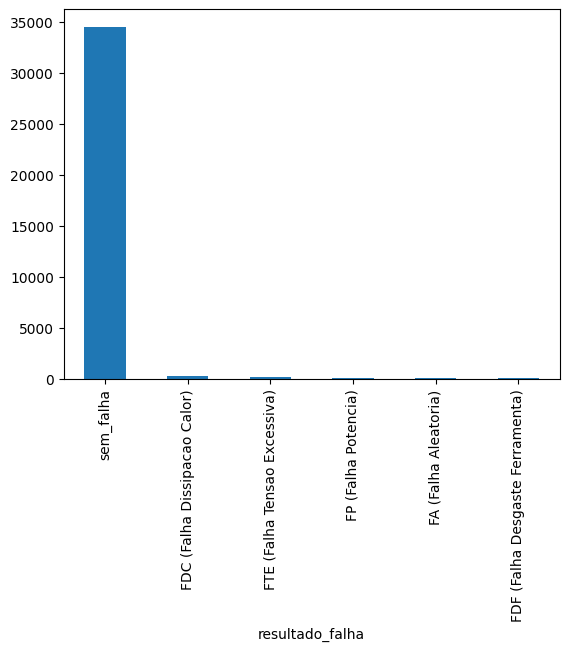

In [132]:
Bootcamp["resultado_falha"].value_counts().plot(kind="bar")

Observa-se um desbalanceamento extremo entre os dados com falha e os dados sem falha, o que será tratado posteriormente.

Com a análise final das variáveis alvo concluída, passamos agora à análise das demais variáveis. Inicialmente, examinaremos as variáveis numéricas e, em seguida, as categóricas. Dessa forma, podemos separar o dataset antes de realizar os encodings, evitando data leakage.

## Análise de variáveis numéricas

In [133]:
Bootcamp.isnull().sum()

id_produto                  0
tipo                        0
temperatura_ar            614
temperatura_processo      598
umidade_relativa            0
velocidade_rotacional     747
torque                    622
desgaste_da_ferramenta    947
resultado_falha             0
dtype: int64

Com essa contagem, é possível perceber que 5 das 15 colunas apresentam valores nulos. O próximo passo é analisar qual seria a melhor estratégia para tratar esses valores.

In [134]:
linhas_nulas = Bootcamp[Bootcamp.isnull().any(axis=1)]
linhas_nulas

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
2         L48850    L           298.2                 307.8              90.0   
4         L53849    L           -36.0                 310.5              90.0   
13        H35319    H             NaN                 310.5              90.0   
15        H35798    H           300.1                 309.6              90.0   
22        L53701    L           301.1                 310.1              90.0   
...          ...  ...             ...                   ...               ...   
35223     L50543    L           301.4                 310.6              90.0   
35230     M15390    M           297.5                 -38.0              90.0   
35240     M21465    M           301.5                 310.6              90.0   
35241     M23187    M           298.8                 309.6              90.0   
35252     L57118    L           298.3                 308.1              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta resultado_falha  
2                     1528.0    31.1                     NaN       sem_falha  
4                     1571.0    33.9                     NaN       sem_falha  
13                    1582.0    31.1                   193.0       sem_falha  
15                       NaN    45.1                   113.0       sem_falha  
22                    1666.0    27.2                     NaN       sem_falha  
...                      ...     ...                     ...             ...  
35223                 1418.0     NaN                   179.0       sem_falha  
35230                    NaN    32.2                    65.0       sem_falha  
35240                 1408.0     NaN                    37.0       sem_falha  
35241                 1663.0    28.8                     NaN       sem_falha  
35252                 1911.0    23.3                     NaN       sem_falha  

[3389 rows x 9 columns]

Existem 3.389 linhas com valores nulos, correspondendo a quase 10% dos dados. Portanto, não é aconselhável simplesmente remover essas linhas; o ideal seria imputar.

Para isso, é necessário analisar o comportamento de cada coluna individualmente. Considerando o pré-suposto de que cada coluna numérica se relaciona com características específicas, como o tipo de máquina, a abordagem mais adequada envolve não apenas a análise do comportamento dos dados, mas também a consideração do balanceamento e a identificação de outliers.

In [135]:
Bootcamp.describe()

temperatura_ar  temperatura_processo  umidade_relativa  \
count    34536.000000          34552.000000      35150.000000   
mean       269.565285            280.414422         89.997665   
std         96.296808             97.007120          0.142414   
min        -36.000000            -38.000000         80.590429   
25%        297.900000            308.500000         90.000000   
50%        299.600000            309.800000         90.000000   
75%        301.100000            310.900000         90.000000   
max        304.500000            313.800000         94.575256   

       velocidade_rotacional        torque  desgaste_da_ferramenta  
count           34403.000000  34528.000000            34203.000000  
mean             1379.960643     40.187489               74.269041  
std               494.436295      8.800303              110.373862  
min              -161.000000      3.800000             -202.000000  
25%              1408.000000     34.300000               28.000000  
50%              1483.000000     40.300000               94.000000  
75%              1574.000000     46.200000              155.000000  
max              2886.000000     76.600000              251.000000

Nesta etapa, além de obter uma visão inicial sobre a distribuição e o comportamento dos dados, é possível observar que algumas colunas apresentam valores negativos, enquanto outras não.

As colunas temperatura_processo e temperatura_ar, medidas em Kelvin, não podem apresentar valores negativos. Da mesma forma, desgaste_da_ferramenta e velocidade_rotacional, medidas em minutos, também não deveriam assumir valores negativos.

Observações:
As contagens das variaveis temperatura_ar, temperatura_processo,velocidade_rotacional, torque e desgaste_da_ferramenta demonstram claramente os nulos.

Além disso, os desvios padrão de temperatura_ar, temperatura_processo, velocidade_rotacional e desgaste_da_ferramenta estão anormalmente altos quando comparados aos quartis, indicando possível presença de outliers.

Para organização, abordaremos a análise por partes, começando pela Temperatura do Ar

###Temperatura do Ar

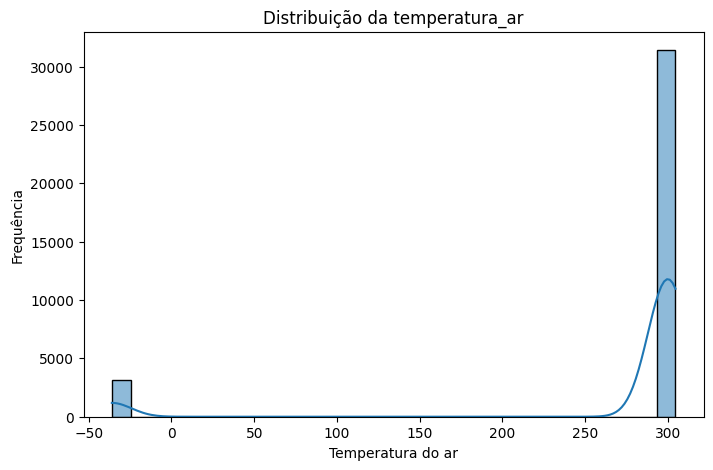

In [136]:
plt.figure(figsize=(8,5))
sns.histplot(Bootcamp["temperatura_ar"], bins=30, kde=True)
plt.title("Distribuição da temperatura_ar")
plt.xlabel("Temperatura do ar")
plt.ylabel("Frequência")
plt.show()

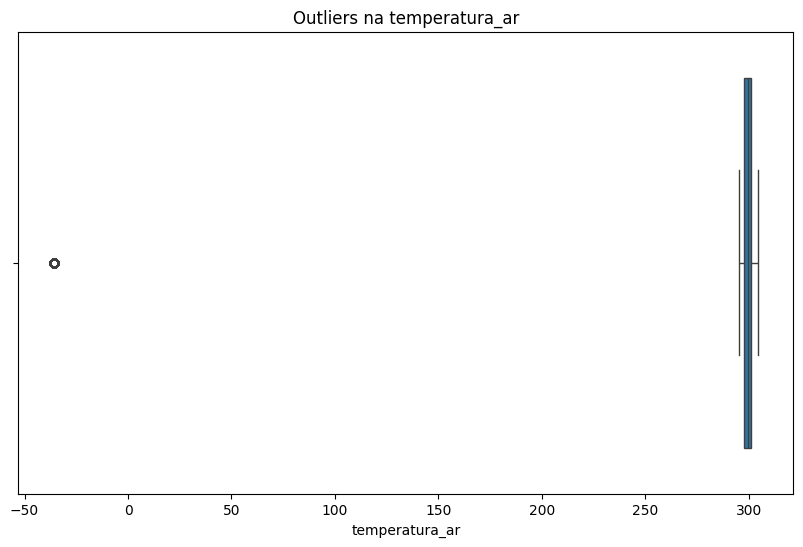

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["temperatura_ar"])
plt.title("Outliers na temperatura_ar")
plt.show()

Fica muito claro, mesmo nos graficos, que essas informações são extremamente destoantes do comum.

In [138]:
Bootcamp.loc[Bootcamp["temperatura_ar"] < 0]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
4         L53849    L           -36.0                 310.5              90.0   
6         M23689    M           -36.0                 308.8              90.0   
23        M23839    M           -36.0                 307.5              90.0   
75        L56058    L           -36.0                 309.2              90.0   
83        M16328    M           -36.0                 309.8              90.0   
...          ...  ...             ...                   ...               ...   
35203     L52054    L           -36.0                 -38.0              90.0   
35209     L49078    L           -36.0                 307.5              90.0   
35210     M17264    M           -36.0                 308.7              90.0   
35212     H36377    H           -36.0                 311.3              90.0   
35244     L55903    L           -36.0                 308.6              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta resultado_falha  
4                     1571.0    33.9                     NaN       sem_falha  
6                     1469.0    44.1                   150.0       sem_falha  
23                    1332.0    51.1                   121.0       sem_falha  
75                    1802.0    26.9                    83.0       sem_falha  
83                    1419.0    44.9                   115.0       sem_falha  
...                      ...     ...                     ...             ...  
35203                 1619.0    31.5                   142.0       sem_falha  
35209                 1303.0    54.8                    35.0       sem_falha  
35210                 2008.0    20.3                    92.0       sem_falha  
35212                 -161.0    39.6                    51.0       sem_falha  
35244                 1578.0    35.7                    76.0       sem_falha  

[3119 rows x 9 columns]

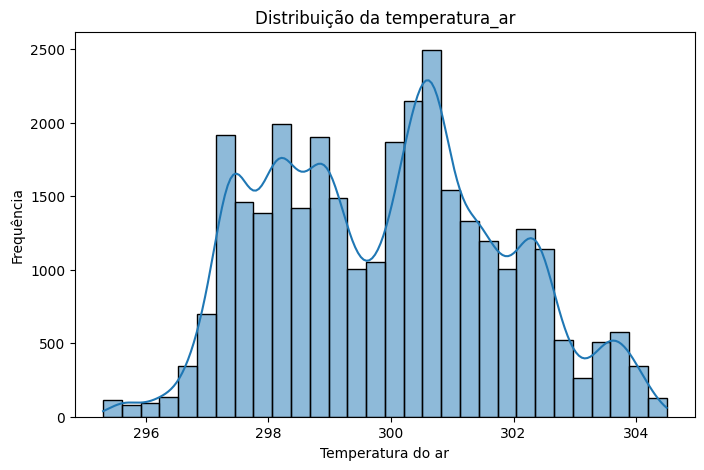

In [139]:
Boot_filtrado = Bootcamp["temperatura_ar"]
Boot_filtrado = Boot_filtrado[Boot_filtrado >= 0]
plt.figure(figsize=(8,5))
sns.histplot(Boot_filtrado, bins=30, kde=True)
plt.title("Distribuição da temperatura_ar")
plt.xlabel("Temperatura do ar")
plt.ylabel("Frequência")
plt.show()

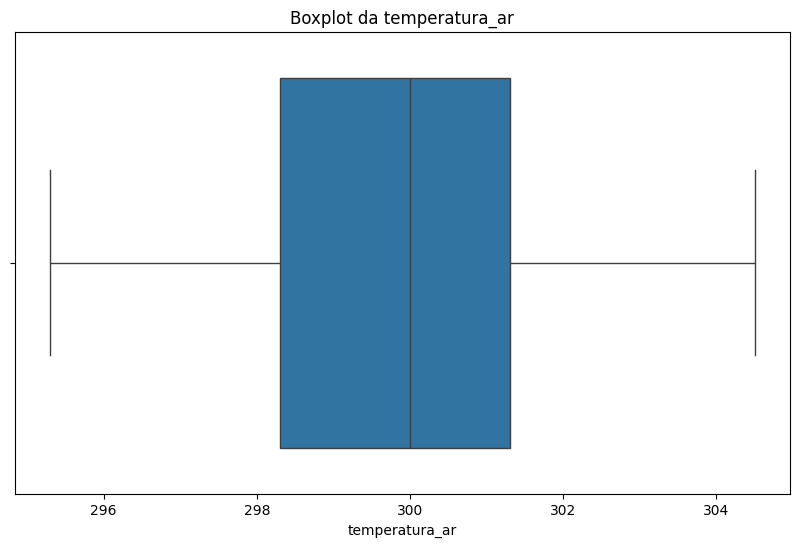

In [140]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Boot_filtrado)
plt.title("Boxplot da temperatura_ar")
plt.show()

In [141]:
Boot_filtrado.describe()

count    31417.000000
mean       299.901031
std          1.891866
min        295.300000
25%        298.300000
50%        300.000000
75%        301.300000
max        304.500000
Name: temperatura_ar, dtype: float64

É possível observar que os dados de temperatura se tornam muito mais consistentes após a remoção dos valores abaixo de zero. Com base nisso, resolveremos tanto o problema dessa inconsistência quanto o dos valores NaN.

Embora a imputação utilizando a média ou a mediana sejam uma soluções adequadas, dado o comportamento consistente dos dados, existe uma abordagem mais sofisticada disponível na biblioteca sklearn. O KNNImputer permite imputar valores considerando as linhas mais próximas e semelhantes, calculando uma média personalizada para cada entrada.

Utilizaremos essa técnica posteriormente, durante a normalização dos dados.

In [142]:
Bootcamp.loc[Bootcamp["temperatura_ar"] < 0, "temperatura_ar"] = np.nan

###temperatura_processo

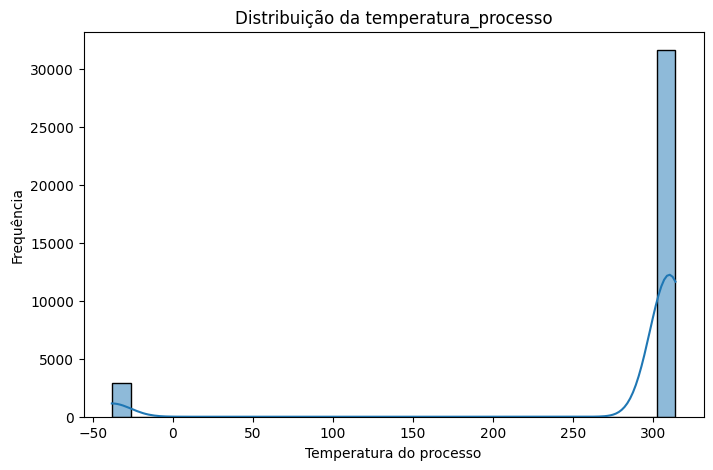

In [143]:
plt.figure(figsize=(8,5))
sns.histplot(Bootcamp["temperatura_processo"], bins=30, kde=True)
plt.title("Distribuição da temperatura_processo")
plt.xlabel("Temperatura do processo")
plt.ylabel("Frequência")
plt.show()

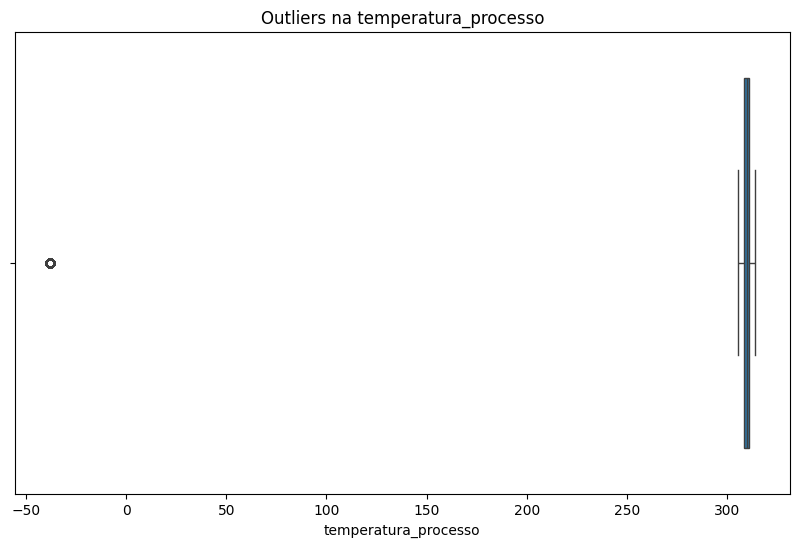

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["temperatura_processo"])
plt.title("Outliers na temperatura_processo")
plt.show()

In [145]:
Bootcamp.loc[Bootcamp["temperatura_processo"] < 0]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
48        L49193    L           298.6                 -38.0              90.0   
77        M23226    M           298.9                 -38.0              90.0   
105       L52996    L           301.3                 -38.0              90.0   
110       L56828    L           299.1                 -38.0              90.0   
114       L48925    L           298.5                 -38.0              90.0   
...          ...  ...             ...                   ...               ...   
35230     M15390    M           297.5                 -38.0              90.0   
35233     L48403    L           297.0                 -38.0              90.0   
35250     L48757    L           298.3                 -38.0              90.0   
35253     L51264    L           302.0                 -38.0              90.0   
35257     L54275    L           300.6                 -38.0              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta resultado_falha  
48                    1485.0    42.9                    38.0       sem_falha  
77                    1836.0    22.8                    18.0       sem_falha  
105                   1582.0    35.6                   202.0       sem_falha  
110                   1416.0    41.2                   185.0       sem_falha  
114                   1624.0    29.8                   160.0       sem_falha  
...                      ...     ...                     ...             ...  
35230                    NaN    32.2                    65.0       sem_falha  
35233                 1565.0    48.1                   137.0       sem_falha  
35250                 1593.0    33.0                   179.0       sem_falha  
35253                 1483.0    35.6                   119.0       sem_falha  
35257                 1485.0    35.8                    19.0       sem_falha  

[2934 rows x 9 columns]

Aparenta ser uma situação bem semelhante a temperatura_Ar

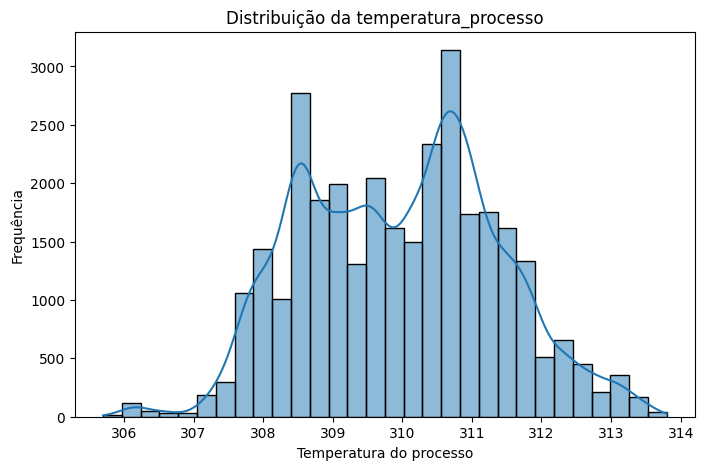

In [146]:
Boot_filtrado1 = Bootcamp["temperatura_processo"]
Boot_filtrado1 = Boot_filtrado1[Boot_filtrado1 >= 0]
plt.figure(figsize=(8,5))
sns.histplot(Boot_filtrado1, bins=30, kde=True)
plt.title("Distribuição da temperatura_processo")
plt.xlabel("Temperatura do processo")
plt.ylabel("Frequência")
plt.show()

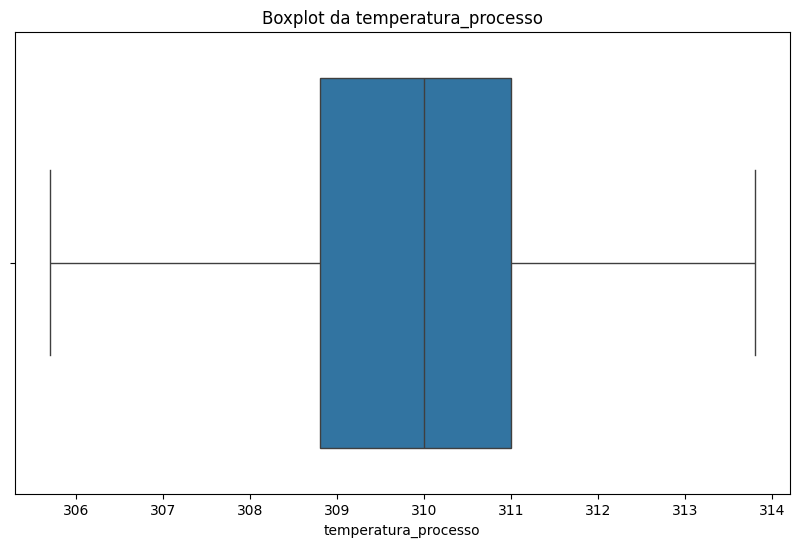

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Boot_filtrado1)
plt.title("Boxplot da temperatura_processo")
plt.show()

Com isso em mente, o tratamento será igual a temperatura_ar

In [148]:
Bootcamp.loc[Bootcamp["temperatura_processo"] < 0, "temperatura_processo"] = np.nan

###umidade_relativa

Embora esta variável não apresente valores nulos, examinaremos seus dados para observar possíveis padrões ou comportamentos relevantes.

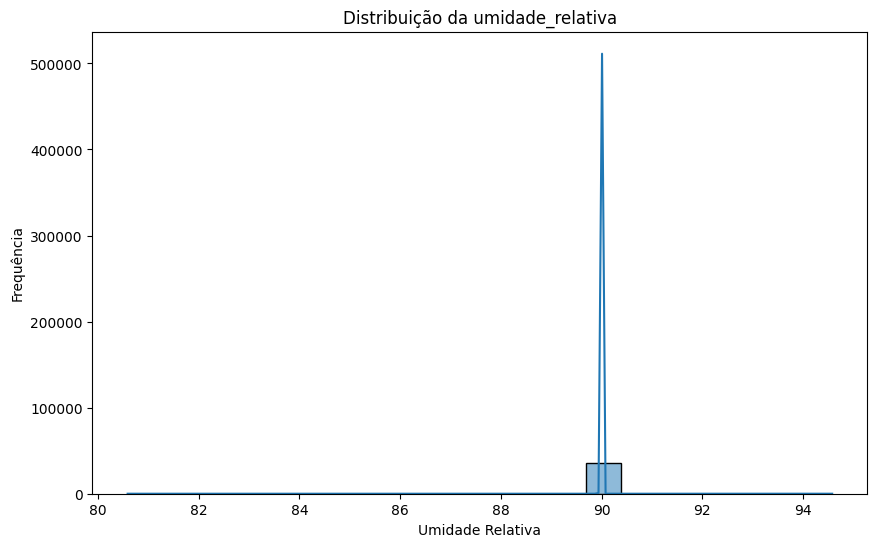

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(Bootcamp["umidade_relativa"], bins=20, kde=True)
plt.title("Distribuição da umidade_relativa")
plt.xlabel("Umidade Relativa")
plt.ylabel("Frequência")
plt.show()

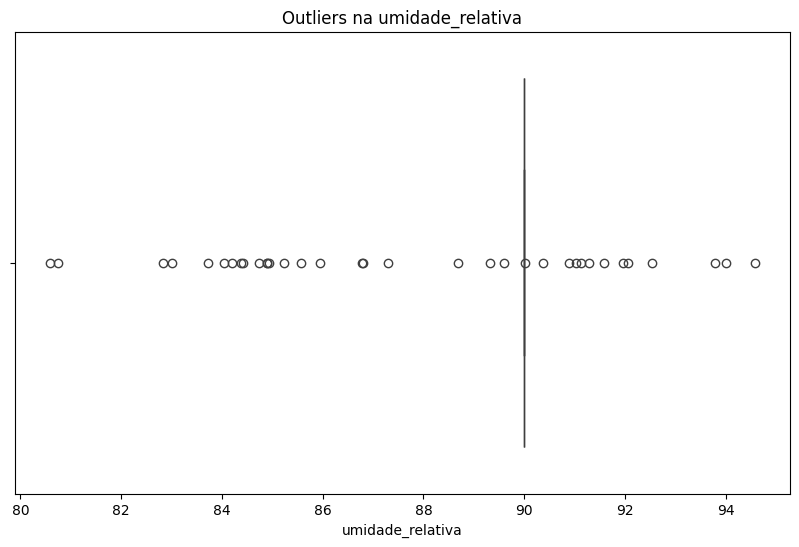

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["umidade_relativa"])
plt.title("Outliers na umidade_relativa")
plt.show()

Os gráficos ficam meio colapsados, mas demonstram uma constância enorme em 90, com poucas mudanças entre 80 a 94. São mudanças plausíveis, então não são consideradas outliers.

Seguem alguns gráficos para visualização mais clara:


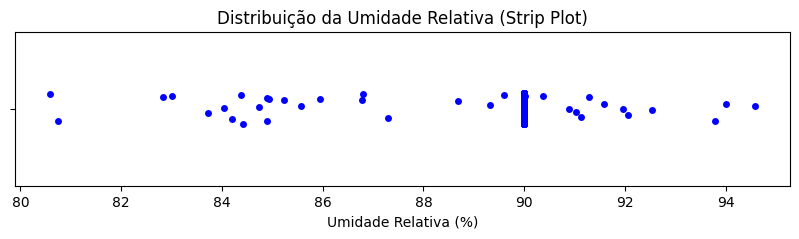

In [151]:
plt.figure(figsize=(10,2))
sns.stripplot(x=Bootcamp["umidade_relativa"], color='blue', jitter=0.1)
plt.title("Distribuição da Umidade Relativa (Strip Plot)")
plt.xlabel("Umidade Relativa (%)")
plt.show()

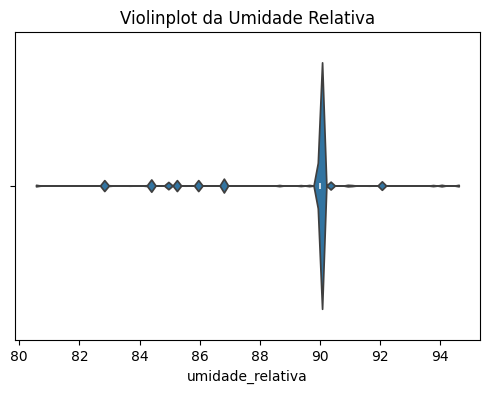

In [152]:
plt.figure(figsize=(6,4))
sns.violinplot(x=Bootcamp["umidade_relativa"])
plt.title("Violinplot da Umidade Relativa")
plt.show()

###velocidade_rotacional

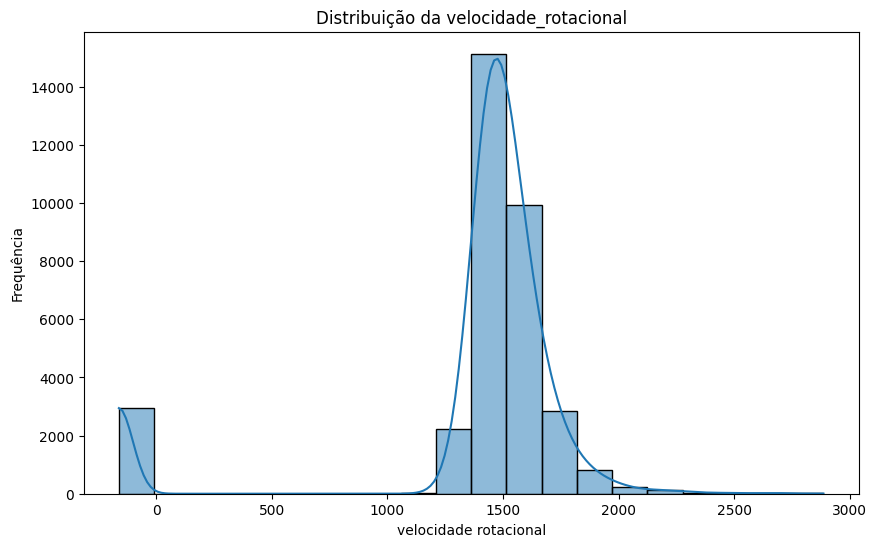

In [153]:
plt.figure(figsize=(10,6))
sns.histplot(Bootcamp["velocidade_rotacional"], bins=20, kde=True)
plt.title("Distribuição da velocidade_rotacional")
plt.xlabel("velocidade rotacional")
plt.ylabel("Frequência")
plt.show()

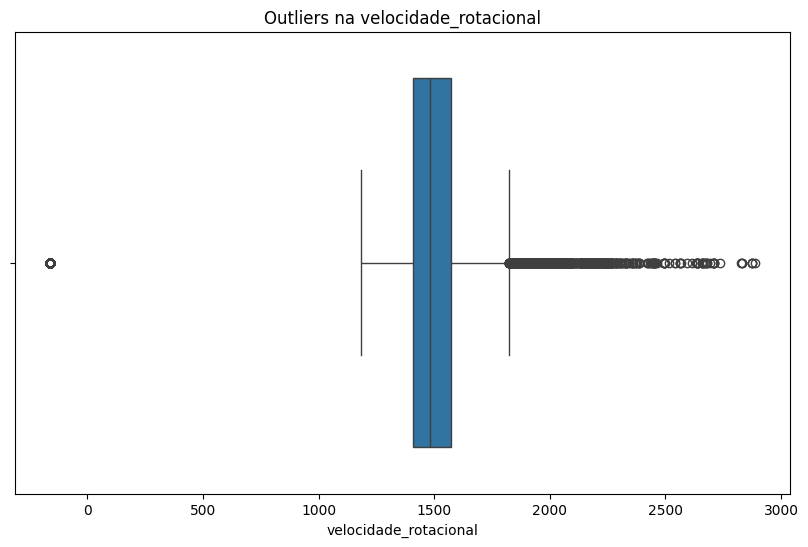

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["velocidade_rotacional"])
plt.title("Outliers na velocidade_rotacional")
plt.show()

A coluna velocidade_rotacional (RPM), conforme indicado nas informações do dataset, mede as rotações por minuto e, dessa forma, não pode apresentar valores negativos.
O primeiro passo então consiste em identificar e tratar esses outliers.

In [155]:
Bootcamp.loc[Bootcamp["velocidade_rotacional"] < 0]

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
5         L53113    L           300.5                 310.5              90.0   
27        M20138    M           303.5                 312.9              90.0   
35        M17988    M           300.1                 309.5              90.0   
36        L56975    L           298.5                 309.3              90.0   
43        M21873    M           300.4                 310.4              90.0   
...          ...  ...             ...                   ...               ...   
35212     H36377    H             NaN                 311.3              90.0   
35219     L54751    L           300.3                 311.1              90.0   
35229     L51638    L           302.6                 310.4              90.0   
35235     L56310    L           297.4                 308.6              90.0   
35251     L52555    L           302.9                 312.3              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta resultado_falha  
5                     -161.0    47.4                    56.0       sem_falha  
27                    -161.0    30.4                   130.0       sem_falha  
35                    -161.0    42.8                    50.0       sem_falha  
36                    -161.0    33.1                   109.0       sem_falha  
43                    -161.0    36.3                    21.0       sem_falha  
...                      ...     ...                     ...             ...  
35212                 -161.0    39.6                    51.0       sem_falha  
35219                 -161.0    47.2                   156.0       sem_falha  
35229                 -161.0    36.1                  -202.0       sem_falha  
35235                 -161.0    34.9                    83.0       sem_falha  
35251                 -161.0    64.7                   185.0       sem_falha  

[2966 rows x 9 columns]

Dadas as quantidades, a imputação por KNN será aplicada.

In [156]:
Bootcamp.loc[Bootcamp["velocidade_rotacional"] < 0, "velocidade_rotacional"] = np.nan

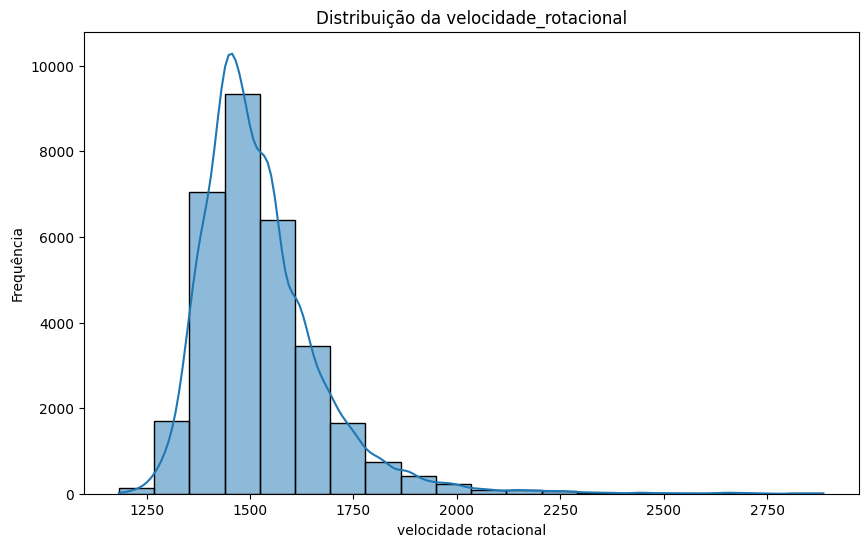

In [157]:
plt.figure(figsize=(10,6))
sns.histplot(Bootcamp["velocidade_rotacional"], bins=20, kde=True)
plt.title("Distribuição da velocidade_rotacional")
plt.xlabel("velocidade rotacional")
plt.ylabel("Frequência")
plt.show()

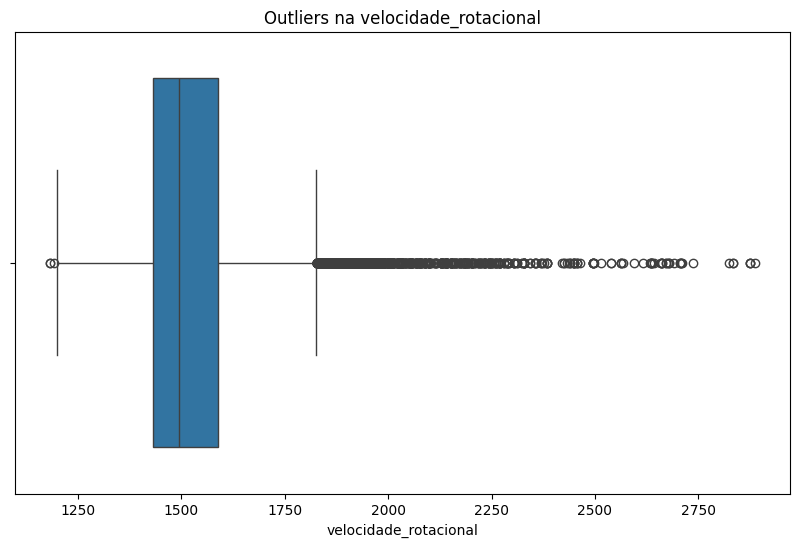

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["velocidade_rotacional"])
plt.title("Outliers na velocidade_rotacional")
plt.show()

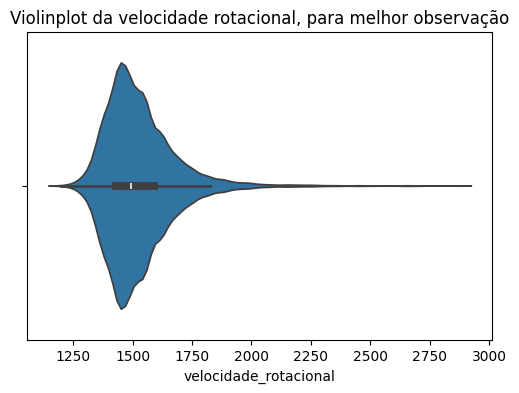

In [159]:
plt.figure(figsize=(6,4))
sns.violinplot(x=Bootcamp["velocidade_rotacional"])
plt.title("Violinplot da velocidade rotacional, para melhor observação")
plt.show()

In [160]:
Bootcamp["velocidade_rotacional"].describe()

count    31437.000000
mean      1525.346312
std        149.514058
min       1183.000000
25%       1431.000000
50%       1495.000000
75%       1589.000000
max       2886.000000
Name: velocidade_rotacional, dtype: float64

Os valores agora estão muito mais plausíveis. Mesmo que ainda apresentem certa dispersão e a formação de uma cauda longa, esses números fazem sentido dentro do contexto industrial analisado.

In [161]:
Q1 = Bootcamp["velocidade_rotacional"].quantile(0.25)
Q3 = Bootcamp["velocidade_rotacional"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = Bootcamp[(Bootcamp["velocidade_rotacional"] < limite_inferior) |
                    (Bootcamp["velocidade_rotacional"] > limite_superior)]
outliers

id_produto tipo  temperatura_ar  temperatura_processo  umidade_relativa  \
24        L53827    L           301.5                 310.5              90.0   
34        M19477    M           303.1                 311.4              90.0   
46        L56349    L           297.7                 308.8              90.0   
58        L49407    L           299.5                 308.8              90.0   
68        L48970    L           298.2                 307.9              90.0   
...          ...  ...             ...                   ...               ...   
35061     H34966    H           302.5                 312.0              90.0   
35179     L53432    L           300.8                 310.3              90.0   
35210     M17264    M             NaN                 308.7              90.0   
35239     L51112    L           302.6                 311.6              90.0   
35252     L57118    L           298.3                 308.1              90.0   

       velocidade_rotacional  torque  desgaste_da_ferramenta resultado_falha  
24                    1927.0    22.4                   149.0       sem_falha  
34                    1831.0     NaN                  -202.0       sem_falha  
46                    1896.0    24.5                   186.0       sem_falha  
58                    1965.0    20.4                   164.0       sem_falha  
68                    1847.0    23.6                    69.0       sem_falha  
...                      ...     ...                     ...             ...  
35061                 1853.0    24.4                   139.0       sem_falha  
35179                 2186.0    14.3                  -202.0       sem_falha  
35210                 2008.0    20.3                    92.0       sem_falha  
35239                 1953.0    22.4                  -202.0       sem_falha  
35252                 1911.0    23.3                     NaN       sem_falha  

[1225 rows x 9 columns]

Como se trata de um número considerável de linhas, a cauda será mantida em mente durante a etapa de escalonamento, e os outliers não serão removidos.

###Torque

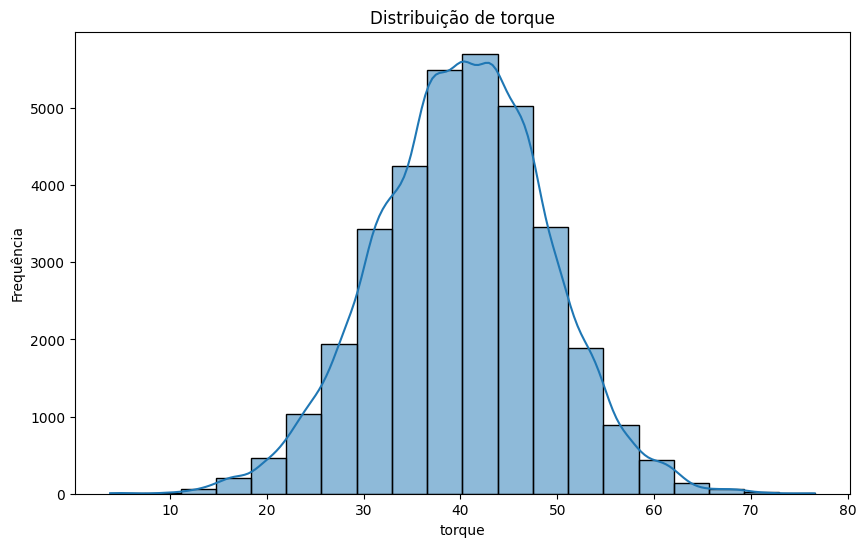

In [162]:
plt.figure(figsize=(10,6))
sns.histplot(Bootcamp["torque"], bins=20, kde=True)
plt.title("Distribuição de torque")
plt.xlabel("torque")
plt.ylabel("Frequência")
plt.show()

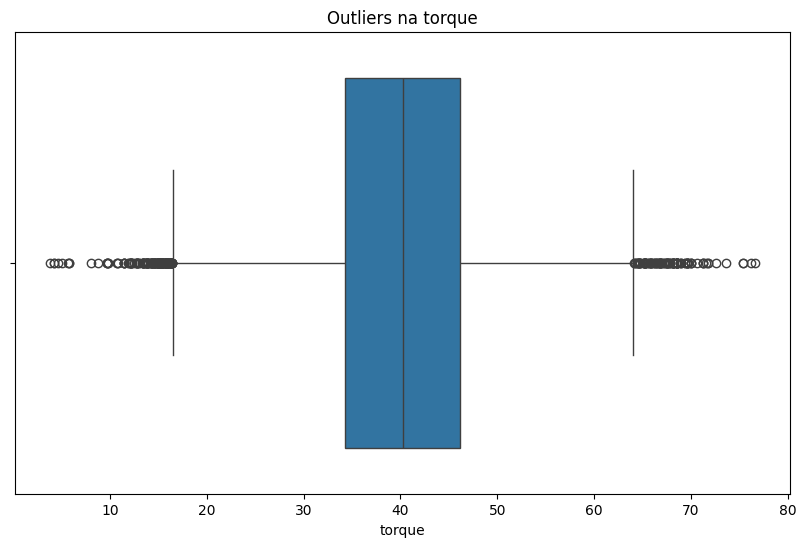

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["torque"])
plt.title("Outliers na torque")
plt.show()

ssa variável apresenta uma distribuição aproximadamente normal e, de acordo com os dados fornecidos pelo describe(), parece consistente.



###desgaste_da_ferramenta

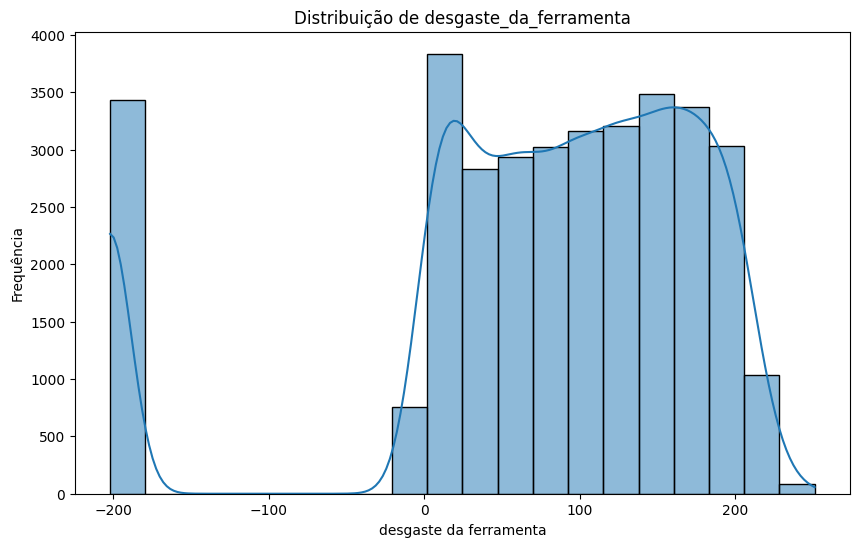

In [164]:
plt.figure(figsize=(10,6))
sns.histplot(Bootcamp["desgaste_da_ferramenta"], bins=20, kde=True)
plt.title("Distribuição de desgaste_da_ferramenta")
plt.xlabel("desgaste da ferramenta")
plt.ylabel("Frequência")
plt.show()

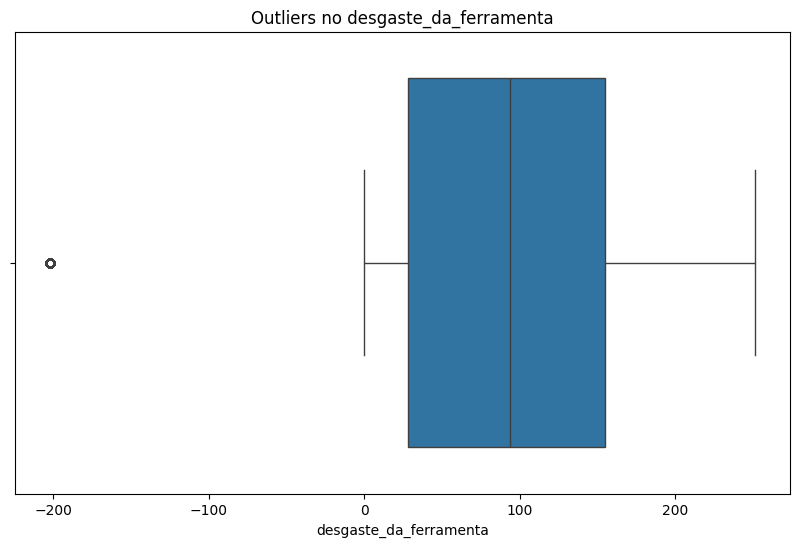

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["desgaste_da_ferramenta"])
plt.title("Outliers no desgaste_da_ferramenta")
plt.show()

O desgaste_da_ferramenta é medido em minutos, e valores negativos não são possíveis. Então, esses outliers são inválidos e devem ser removidos.

In [166]:
Bootcamp.loc[Bootcamp["desgaste_da_ferramenta"] < 0, "desgaste_da_ferramenta"] = np.nan

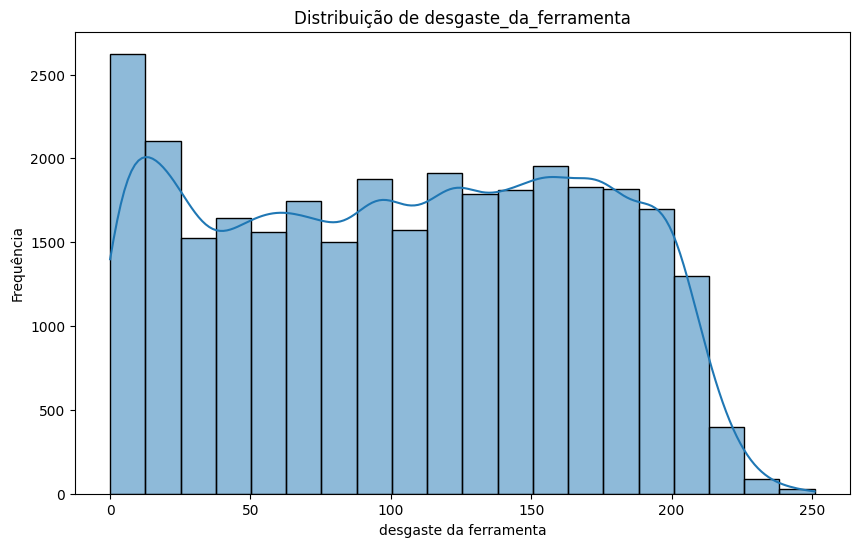

In [167]:
plt.figure(figsize=(10,6))
sns.histplot(Bootcamp["desgaste_da_ferramenta"], bins=20, kde=True)
plt.title("Distribuição de desgaste_da_ferramenta")
plt.xlabel("desgaste da ferramenta")
plt.ylabel("Frequência")
plt.show()

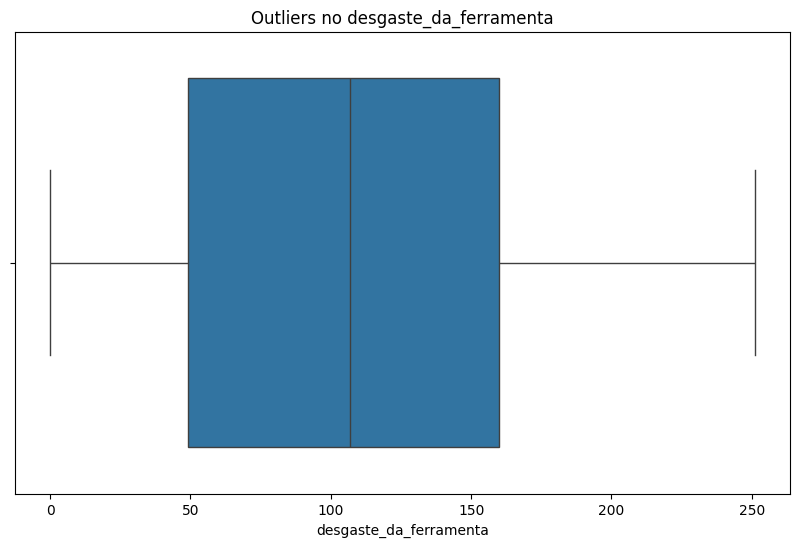

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bootcamp["desgaste_da_ferramenta"])
plt.title("Outliers no desgaste_da_ferramenta")
plt.show()

Dessa forma, a variável se torna mais balanceada

##Variáveis categóricas

Iniciaremos pela coluna tipo, que é a principal para nossa análise de variáveis categóricas. Para tornar essa coluna mais adequada para os modelos, aplicaremos o one-hot encoding, utilizando a biblioteca de pré-processamento do sklearn.

Esse procedimento será realizado posteriormente, juntamente com os processos de normalização e imputação, a fim de evitar data leakage.

In [169]:
Bootcamp["tipo"].value_counts()

tipo
L    23792
M     8764
H     2594
Name: count, dtype: int64

<Axes: xlabel='tipo'>

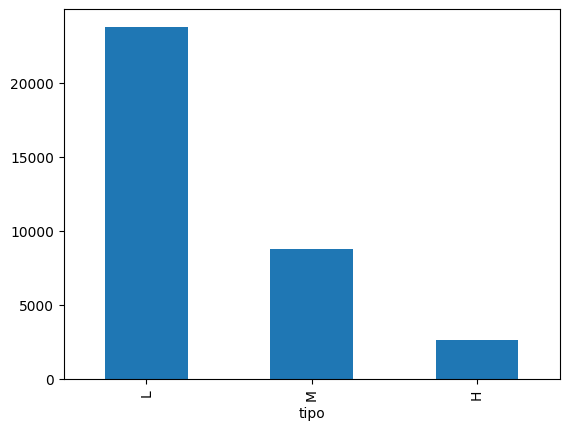

In [170]:
Bootcamp["tipo"].value_counts().plot(kind="bar")

Os dados parecem apresentar um certo desbalanceamento entre os tipos de máquina. Essa é uma observação importante para o treinamento do modelo, sendo recomendável considerar algoritmos que permitam balanceamento de features.

Nas análises multivariadas, avaliaremos como esse balanceamento se relaciona com os tipos de falha.

Agora, quanto a variável Id_produto:

In [171]:
Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"]["id_produto"].value_counts().head(5)

id_produto
M18096    4
L52241    4
L51655    4
L51364    3
L56354    3
Name: count, dtype: int64

Sendo uma variável de identificação, a coluna id_produto não traz informações muito relevantes sobre as falhas e, portanto, será removida.

Entretanto, é possível observar que algumas máquinas apresentam mais ocorrências de erro do que outras, ainda que essas diferenças não sejam muito expressivas.

In [172]:
Bootcamp[(Bootcamp["id_produto"] == "M18096") & (Bootcamp["resultado_falha"] != "sem_falha")][["id_produto", "resultado_falha"]]

id_produto               resultado_falha
4709      M18096  FDC (Falha Dissipacao Calor)
14046     M18096  FDC (Falha Dissipacao Calor)
23268     M18096  FDC (Falha Dissipacao Calor)
23654     M18096  FDC (Falha Dissipacao Calor)

A tabela acima apresenta os erros registrados por uma das máquinas que mais apresentou falhas. Esses dados são fornecidos apenas por interesse exploratório, pois, para fins de previsão, é necessário trabalhar com informações mais generalizadas. Portanto, essa coluna será removida.

In [77]:
Bootcamp.drop("id_produto", axis=1, inplace=True)

Pronto, colunas de tipo prontas para usar no modelo, agora vamos para as variáveis numéricas

##RELAÇÕES MULTIVARIADAS

Agora analisaremos as relações entre as variaveis do dataset, com foco nas variaveis alvo.

Visto o desbalanceamento da classe "sem_falha" em relação às demais, optaremos por excluí-la temporariamente dessas análises, de forma a concentrar a avaliação no comportamento das falhas propriamente ditas.

<Axes: title={'center': 'Erros em máquinas tipo L'}, xlabel='resultado_falha'>

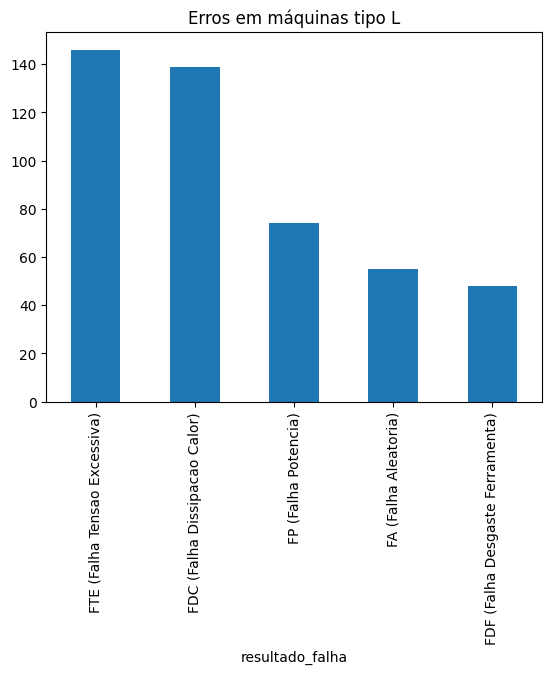

In [79]:
erros_L =  Bootcamp[(Bootcamp["tipo"] == "L") & (Bootcamp["resultado_falha"] != "sem_falha")]["resultado_falha"].value_counts()
erros_L.plot(kind="bar", title="Erros em máquinas tipo L")

<Axes: title={'center': 'Erros em máquinas tipo M'}, xlabel='resultado_falha'>

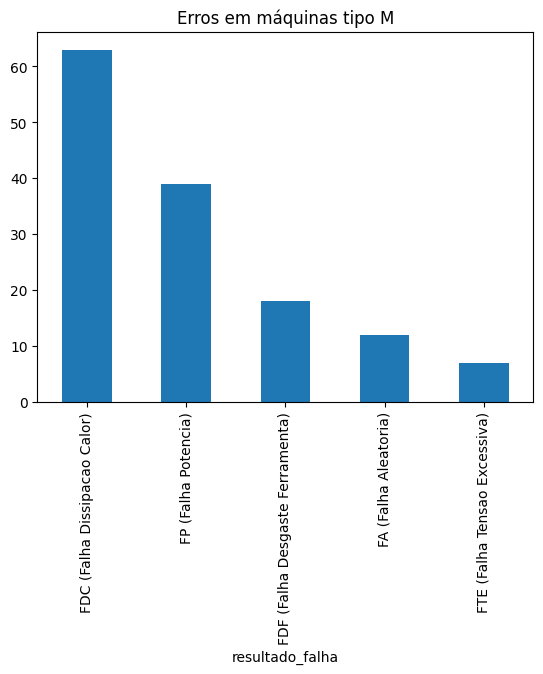

In [80]:
erros_M =  Bootcamp[(Bootcamp["tipo"] == "M") & (Bootcamp["resultado_falha"] != "sem_falha")]["resultado_falha"].value_counts()
erros_M.plot(kind="bar", title="Erros em máquinas tipo M")

<Axes: title={'center': 'Erros em máquinas tipo H'}, xlabel='resultado_falha'>

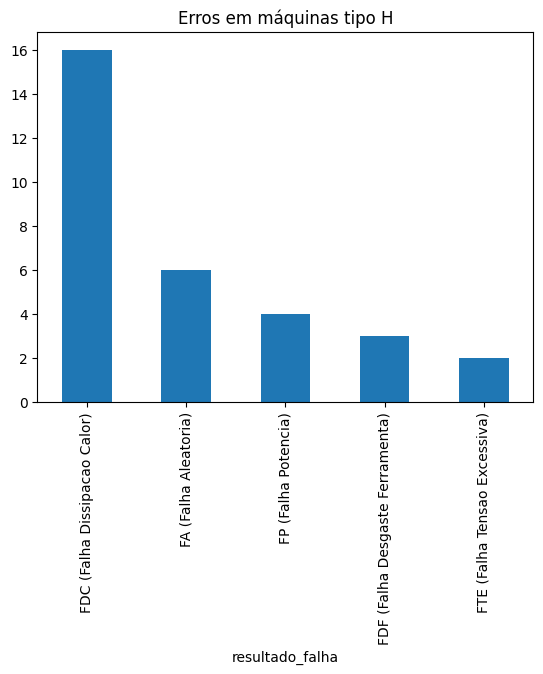

In [81]:
erros_H =  Bootcamp[(Bootcamp["tipo"] == "H") & (Bootcamp["resultado_falha"] != "sem_falha")]["resultado_falha"].value_counts()
erros_H.plot(kind="bar", title="Erros em máquinas tipo H")

As máquinas do tipo L apresentam uma tendência significativamente maior de falhas por **Tensão Excessiva** e por **Dissipação de Calor**.

Já as máquinas do tipo M registram mais ocorrências de **Dissipação de Calor** e de **Falhas de Potência**.

No caso das máquinas do tipo H, também há predominância de falhas por **Dissipação de Calor**, mas com destaque para a quantidade relativamente elevada de **falhas aleatórias**.

Esse comportamento pode estar relacionado a dificuldades na análise das máquinas do tipo H. Como elas também representam o menor número de amostras no dataset, é plausível que exista, de forma geral, um menor conhecimento acumulado sobre o seu funcionamento. Esse aspecto poderá ser explorado mais adiante, quando analisarmos a relação entre variáveis e falhas.

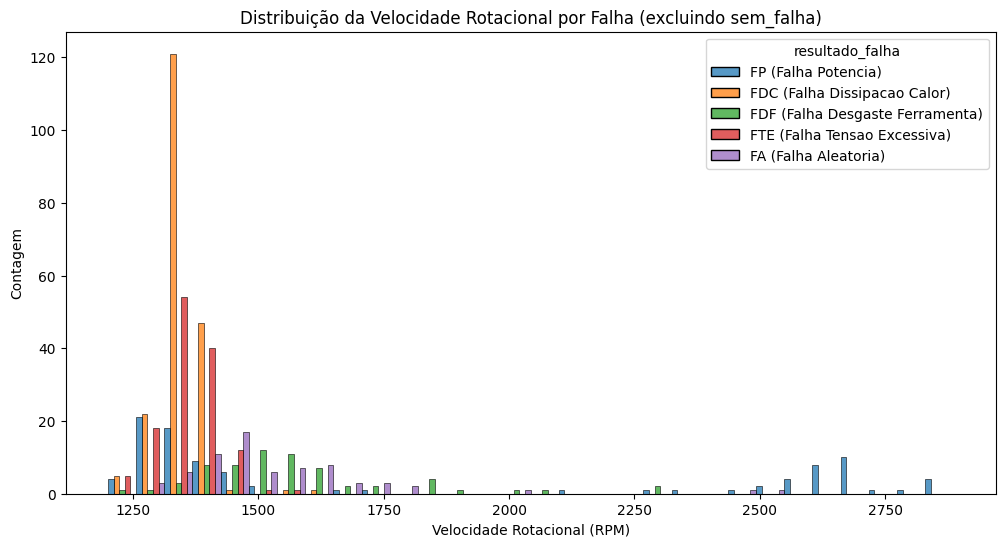

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="velocidade_rotacional",
    hue="resultado_falha",
    multiple="dodge",
    bins=30,
    palette="tab10"
)
plt.title("Distribuição da Velocidade Rotacional por Falha (excluindo sem_falha)")
plt.xlabel("Velocidade Rotacional (RPM)")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-354180903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


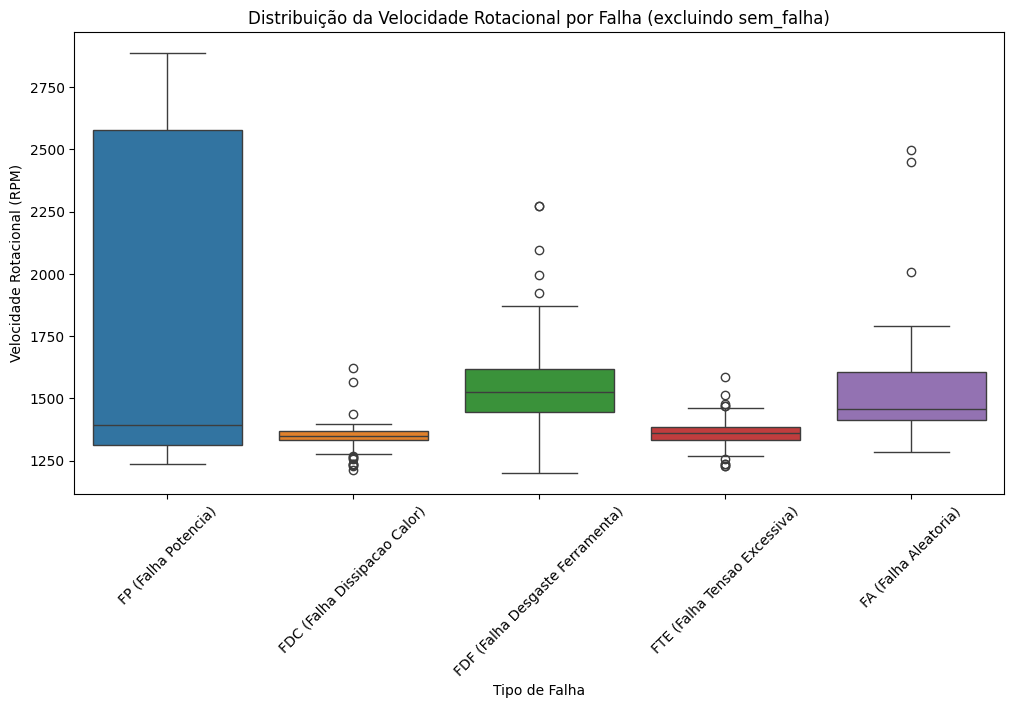

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="resultado_falha",
    y="velocidade_rotacional",
    palette="tab10"
)
plt.title("Distribuição da Velocidade Rotacional por Falha (excluindo sem_falha)")
plt.xlabel("Tipo de Falha")
plt.ylabel("Velocidade Rotacional (RPM)")
plt.xticks(rotation=45)
plt.show()

Os picos de velocidade rotacional parecem estar mais associados às falhas de potência. Vamos verificar agora como as demais variáveis numéricas se relacionam com os diferentes tipos de falha.

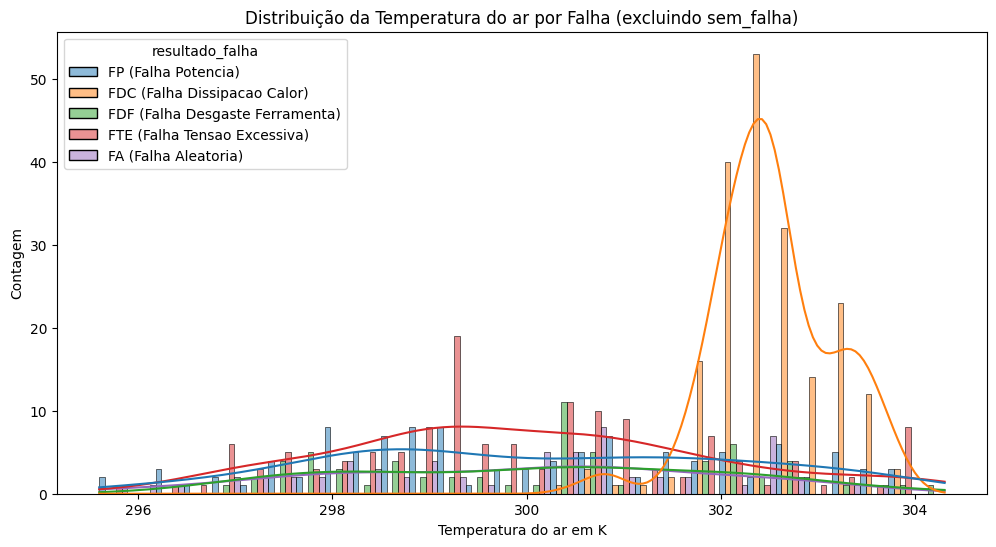

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="temperatura_ar",
    hue="resultado_falha",
    multiple="dodge",
    bins=30,
    palette="tab10", kde=True
)
plt.title("Distribuição da Temperatura do ar por Falha (excluindo sem_falha)")
plt.xlabel("Temperatura do ar em K")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-3654912106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


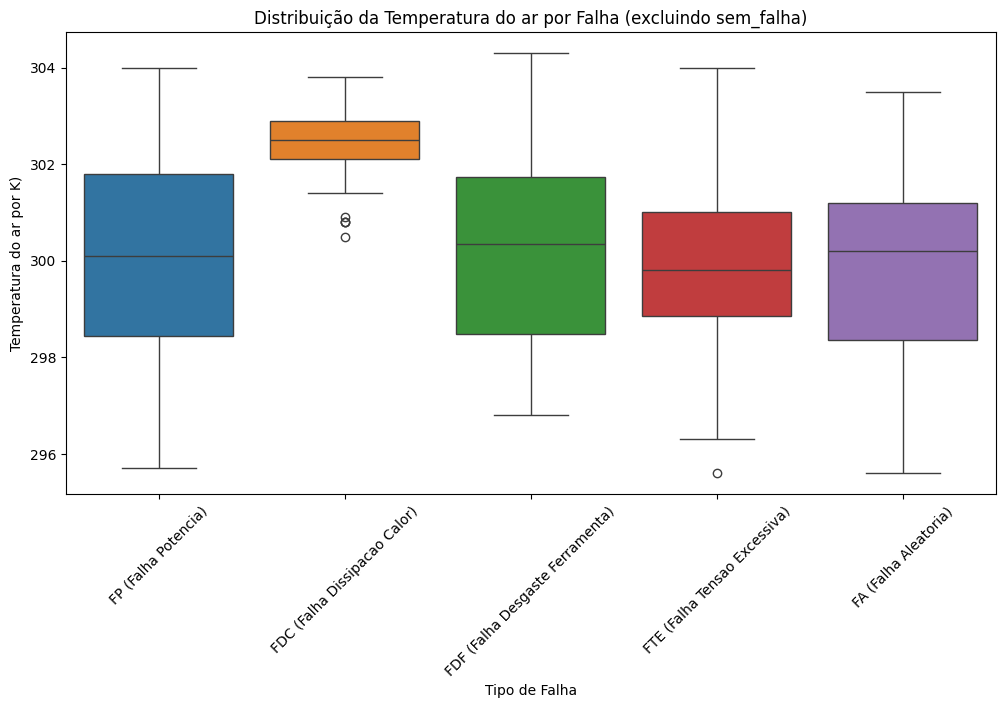

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="resultado_falha",
    y="temperatura_ar",
    palette="tab10"
)
plt.title("Distribuição da Temperatura do ar por Falha (excluindo sem_falha)")
plt.xlabel("Tipo de Falha")
plt.ylabel("Temperatura do ar por K)")
plt.xticks(rotation=45)
plt.show()

As falhas de dissipação de calor parecem estar fortemente relacionadas ao aumento da temperatura ambiente.

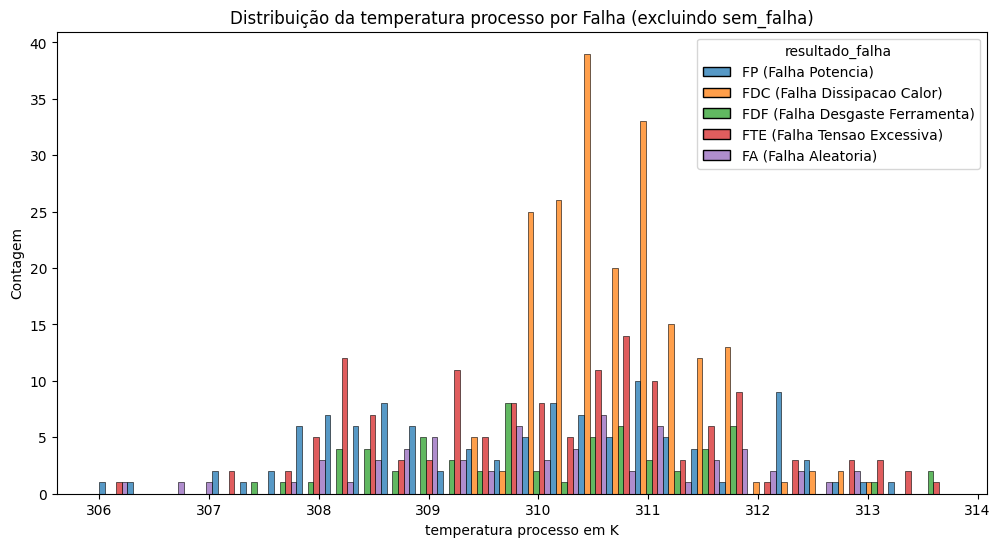

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="temperatura_processo",
    hue="resultado_falha",
    multiple="dodge",
    bins=30,
    palette="tab10"
)
plt.title("Distribuição da temperatura processo por Falha (excluindo sem_falha)")
plt.xlabel("temperatura processo em K")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-2289663144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


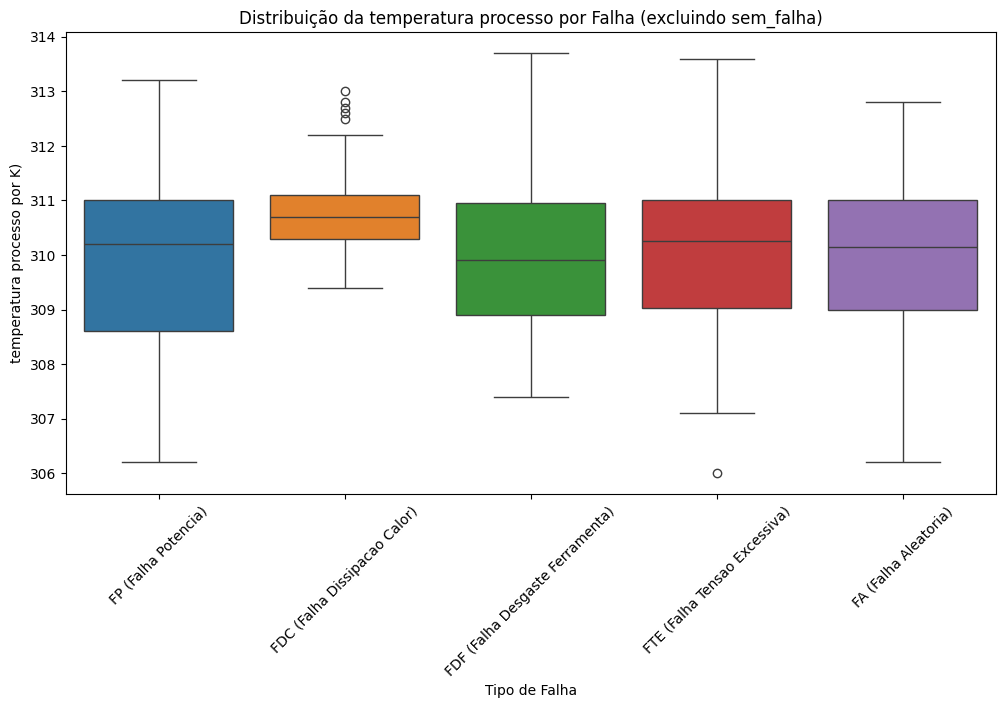

In [87]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="resultado_falha",
    y="temperatura_processo",
    palette="tab10"
)
plt.title("Distribuição da temperatura processo por Falha (excluindo sem_falha)")
plt.xlabel("Tipo de Falha")
plt.ylabel("temperatura processo por K)")
plt.xticks(rotation=45)
plt.show()

Seguindo os gráficos, a temperatura do processo apresenta uma relação mais dispersa com a maioria das falhas, exceto a de dissipação de calor. No entanto, essa falha demonstra uma relação mais forte com a temperatura do ambiente do que com a do processo, indicando uma maior sensibilidade das máquinas às condições ambientais.

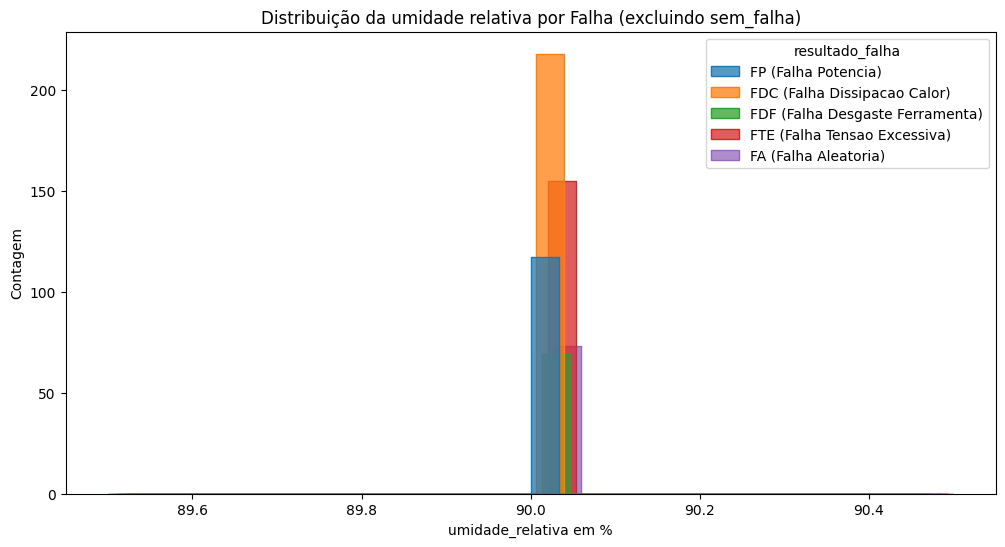

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="umidade_relativa",
    hue="resultado_falha",
    multiple="dodge",
    bins=30,
    palette="tab10", element='step'
)
plt.title("Distribuição da umidade relativa por Falha (excluindo sem_falha)")
plt.xlabel("umidade_relativa em %")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-139278939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


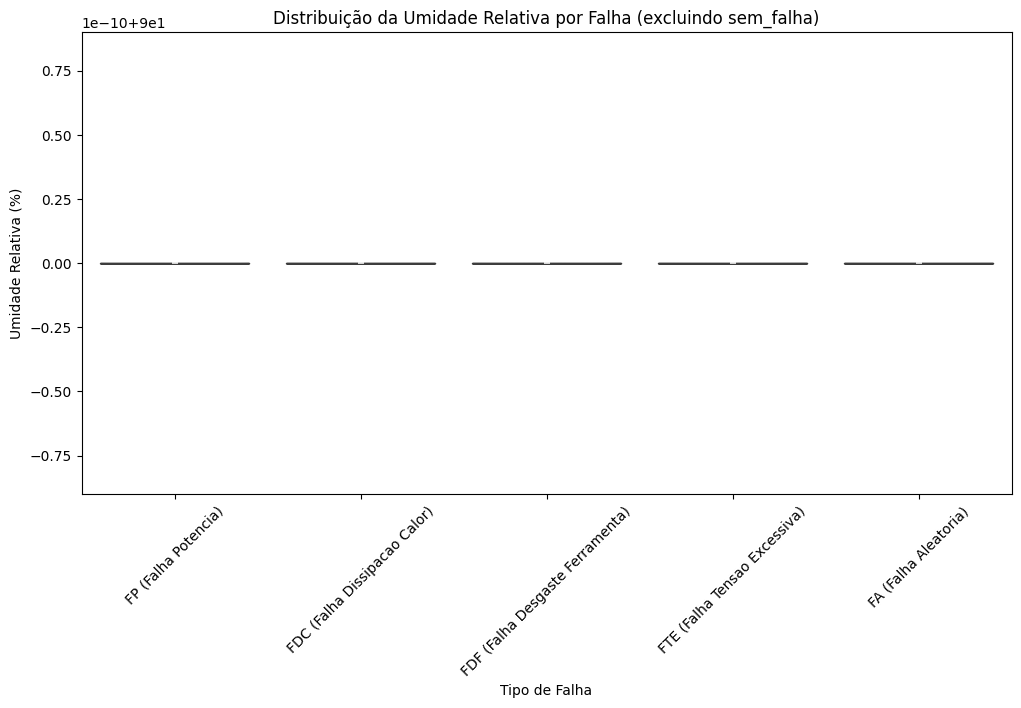

In [89]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="resultado_falha",
    y="umidade_relativa",
    palette="tab10"
)
plt.title("Distribuição da Umidade Relativa por Falha (excluindo sem_falha)")
plt.xlabel("Tipo de Falha")
plt.ylabel("Umidade Relativa (%)")
plt.xticks(rotation=45)
plt.show()

A distribuição da umidade relativa parece ser mais equilibrada, oferecendo menos informações relevantes para a análise.

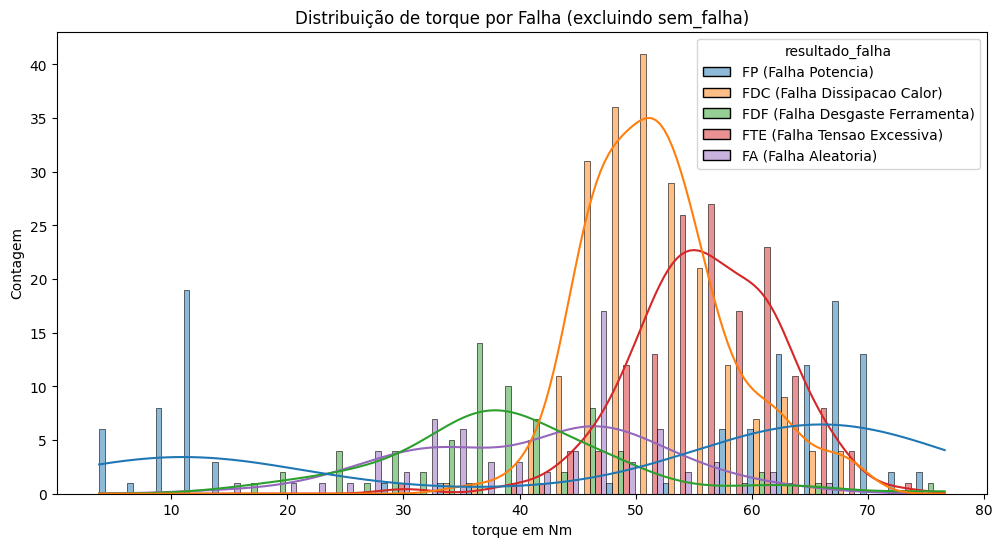

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="torque",
    hue="resultado_falha",
    multiple="dodge",
    bins=30,
    palette="tab10", kde=True
)
plt.title("Distribuição de torque por Falha (excluindo sem_falha)")
plt.xlabel("torque em Nm")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-11223163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


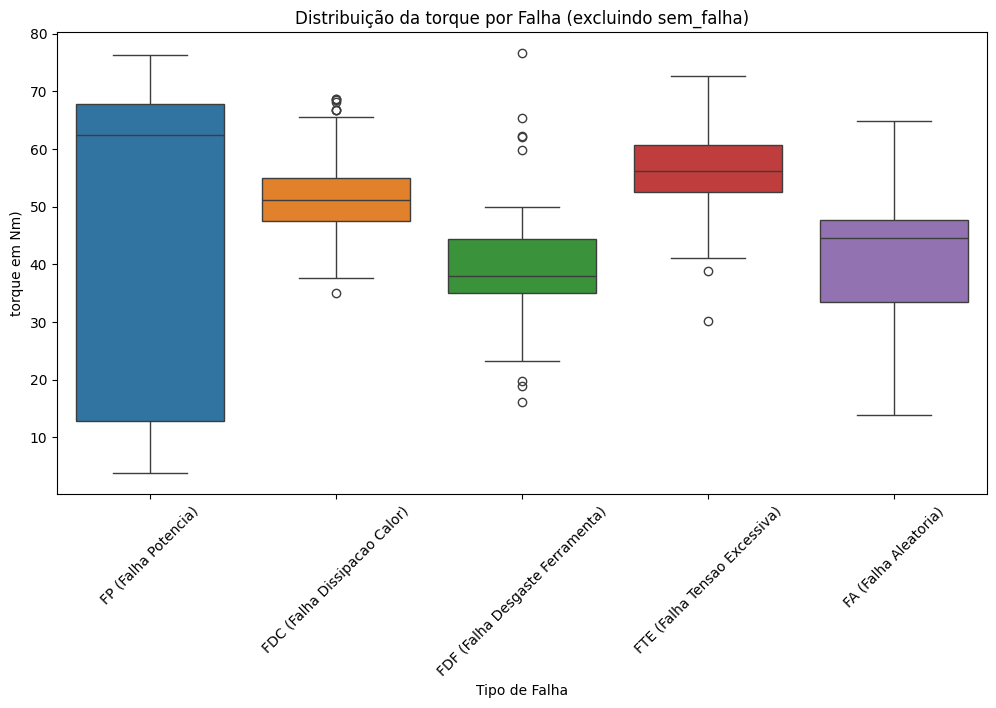

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="resultado_falha",
    y="torque",
    palette="tab10"
)
plt.title("Distribuição da torque por Falha (excluindo sem_falha)")
plt.xlabel("Tipo de Falha")
plt.ylabel("torque em Nm)")
plt.xticks(rotation=45)
plt.show()

As falhas de potência concentram-se principalmente nos valores extremos de torque, enquanto as falhas de dissipação de calor e de tensão excessiva tendem a aumentar conforme o torque se eleva. As falhas aleatórias apresentam um pico em valores medianos. Em comparação com as demais variáveis, a falha de tensão excessiva demonstra a relação mais forte com o torque, embora falhas por desgaste e falhas aleatórias também apresentem certa relevância.

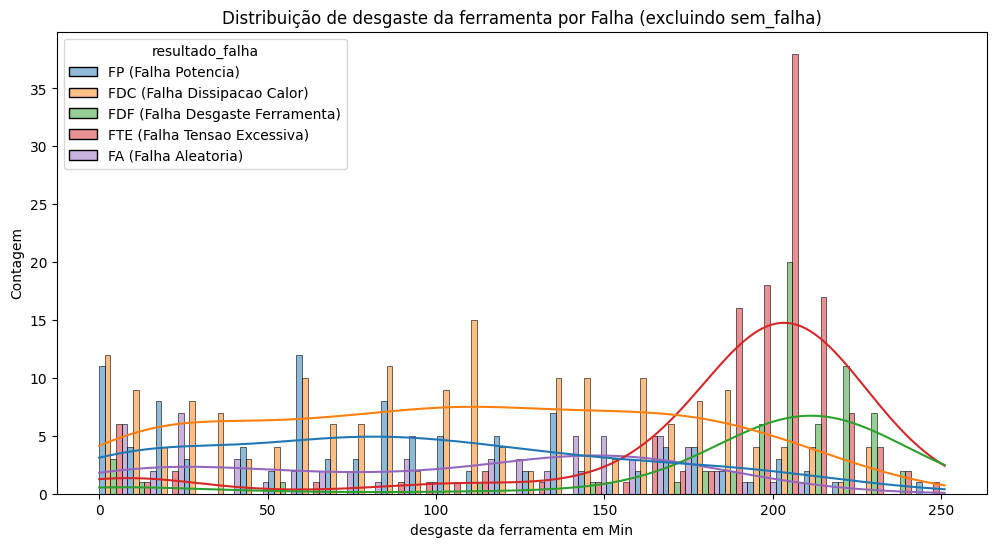

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="desgaste_da_ferramenta",
    hue="resultado_falha",
    multiple="dodge",
    bins=30,
    palette="tab10", kde=True
)
plt.title("Distribuição de desgaste da ferramenta por Falha (excluindo sem_falha)")
plt.xlabel("desgaste da ferramenta em Min")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-2587004374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


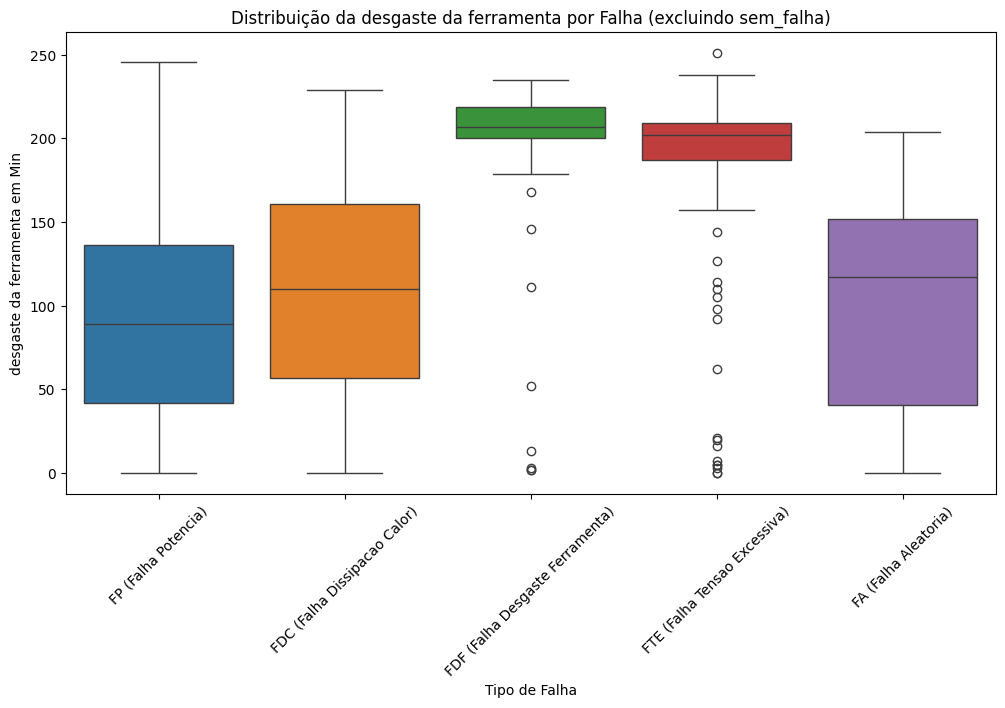

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="resultado_falha",
    y="desgaste_da_ferramenta",
    palette="tab10"
)
plt.title("Distribuição da desgaste da ferramenta por Falha (excluindo sem_falha)")
plt.xlabel("Tipo de Falha")
plt.ylabel("desgaste da ferramenta em Min")
plt.xticks(rotation=45)
plt.show()

Indiscutivelmente, as falhas por tensão apresentam uma forte relação fortissima com o desgaste da ferramenta. Além disso, as falhas por desgaste também mostram uma ligação significativa com o desgaste da ferramenta ao longo do tempo.

Agora, analisaremos as variáveis numéricas de acordo com o tipo de máquina.

/tmp/ipython-input-2165529172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


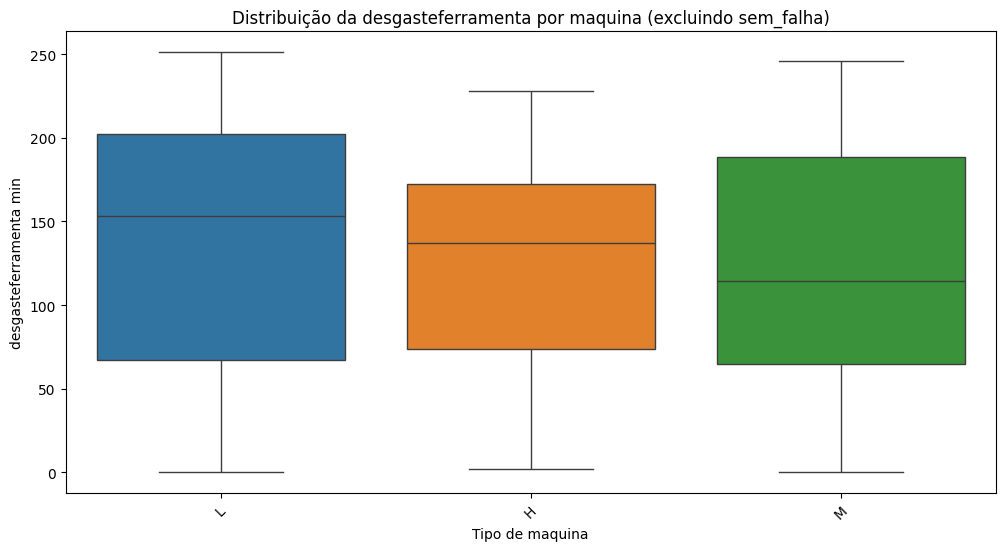

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="tipo",
    y="desgaste_da_ferramenta",
    palette="tab10"
)
plt.title("Distribuição da desgasteferramenta por maquina (excluindo sem_falha)")
plt.xlabel("Tipo de maquina")
plt.ylabel("desgasteferramenta min")
plt.xticks(rotation=45)
plt.show()

Como esperado, a máquina do tipo L, que apresenta mais falhas por tensão, possui tempos médios de desgaste maiores nas medições que resultaram em falhas, quando comparada às demais máquinas. A máquina M apresenta valores ligeiramente inferiores, condizentes com suas falhas de desgaste medianas. Já a máquina H apresenta valores mais centralizados, e suas falhas não estão predominantemente associadas nem à tensão nem ao desgaste.

/tmp/ipython-input-2746188916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


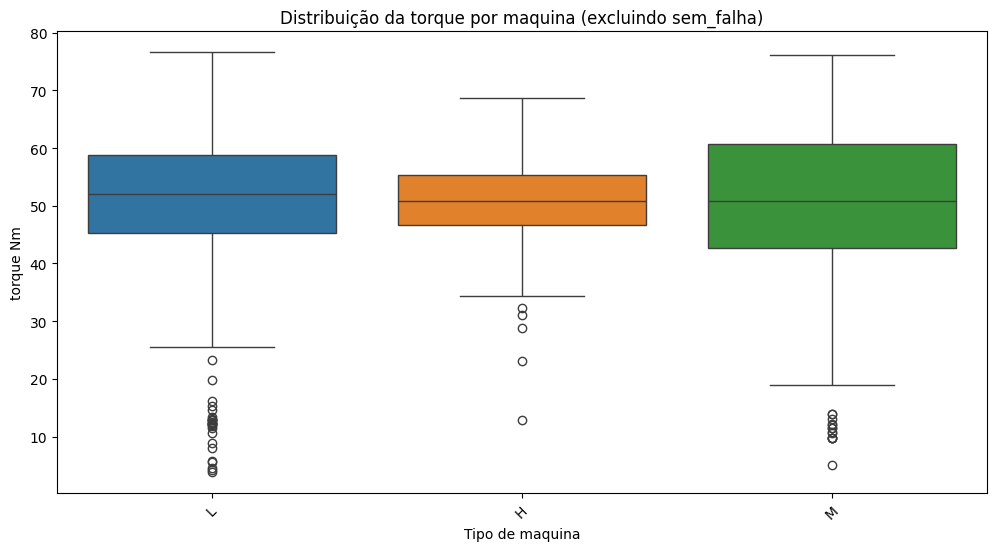

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="tipo",
    y="torque",
    palette="tab10"
)
plt.title("Distribuição da torque por maquina (excluindo sem_falha)")
plt.xlabel("Tipo de maquina")
plt.ylabel("torque Nm")
plt.xticks(rotation=45)
plt.show()


O torque também contribui para as falhas por tensão, o que explica a maior concentração de falhas do tipo L em valores mais elevados em relação às demais máquinas. As falhas por dissipação de calor estão fortemente associadas ao torque, refletindo-se na maior consistência da concentração de falhas nas máquinas H e M.

/tmp/ipython-input-3685237913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


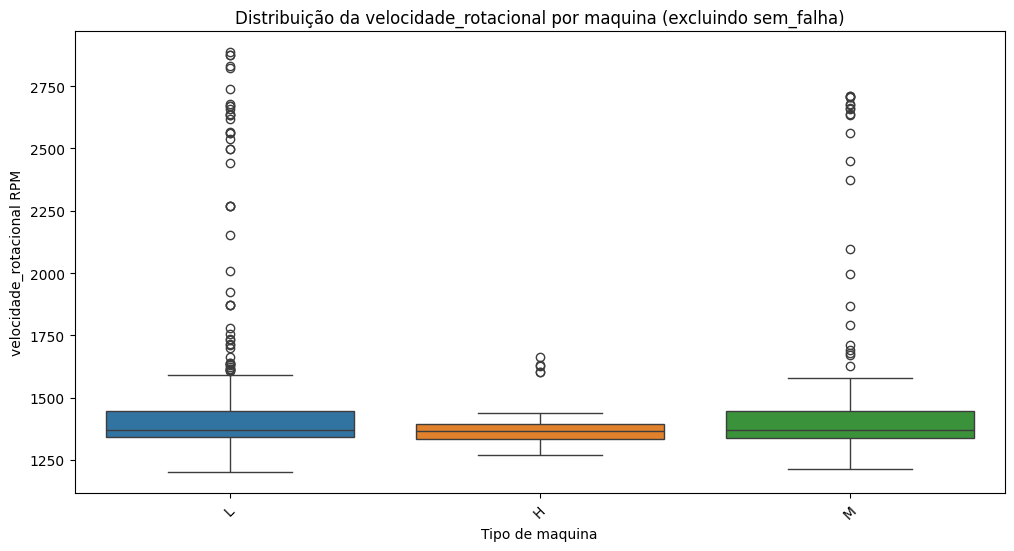

In [96]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="tipo",
    y="velocidade_rotacional",
    palette="tab10"
)
plt.title("Distribuição da velocidade_rotacional por maquina (excluindo sem_falha)")
plt.xlabel("Tipo de maquina")
plt.ylabel("velocidade_rotacional RPM")
plt.xticks(rotation=45)
plt.show()

As falhas por dissipação de energia, mais expressivas do que as falhas de potência para as três máquinas, estão concentradas nos valores mais baixos da variável. Isso explica a distribuição observada das falhas para as três máquinas conforme apresentada.

A umidade relativa apresenta uma distribuição bastante concentrada, como já observado, tornando os gráficos pouco expressivos para análise.

Prosseguiremos, então, com a análise da variável temperatura_ar


/tmp/ipython-input-3828954162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


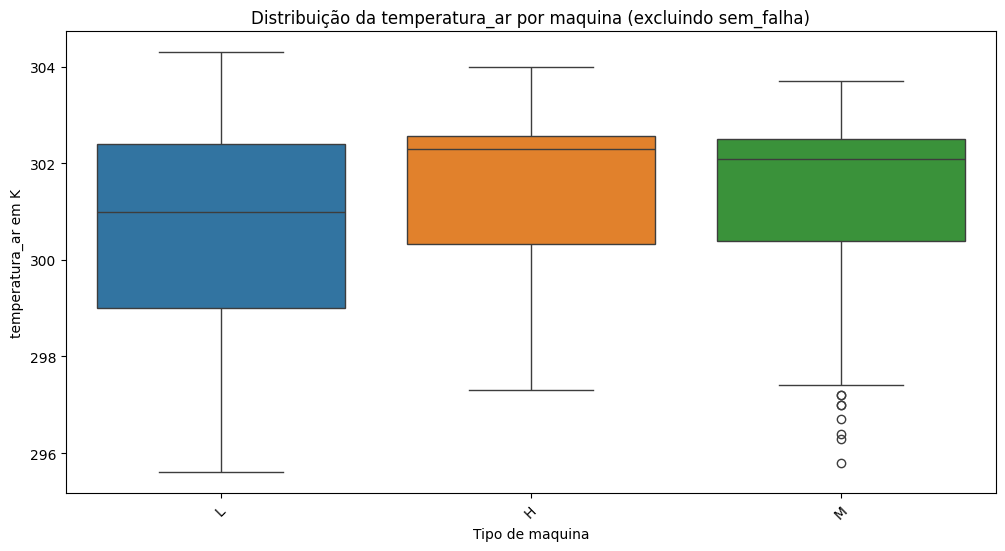

In [98]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="tipo",
    y="temperatura_ar",
    palette="tab10"
)
plt.title("Distribuição da temperatura_ar por maquina (excluindo sem_falha)")
plt.xlabel("Tipo de maquina")
plt.ylabel("temperatura_ar em K")
plt.xticks(rotation=45)
plt.show()

As falhas por dissipação de calor e por tensão nas máquinas H e M parecem estar fortemente associadas à temperatura ambiente. No caso das máquinas L, essa associação é observável, mas menos expressiva.

/tmp/ipython-input-3444120531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


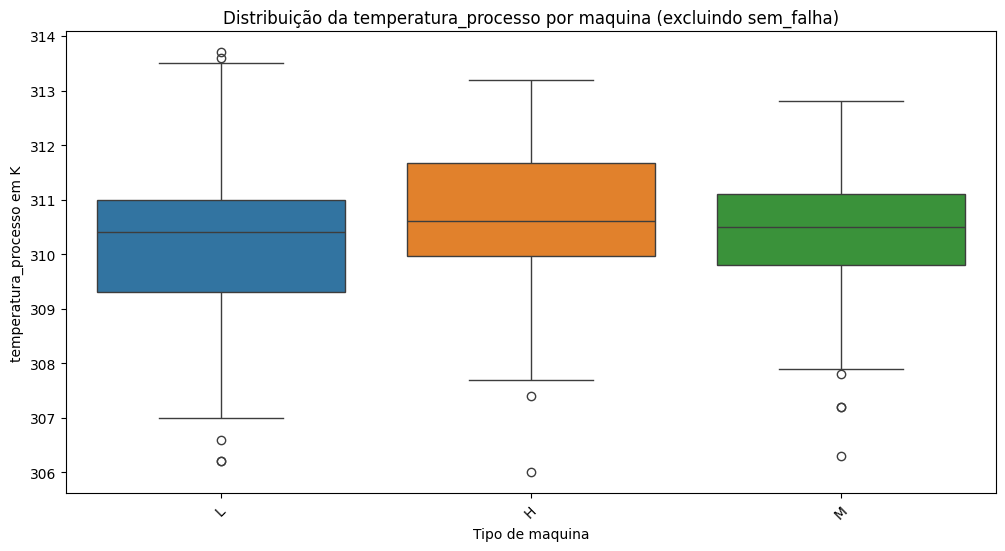

In [97]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    x="tipo",
    y="temperatura_processo",
    palette="tab10"
)
plt.title("Distribuição da temperatura_processo por maquina (excluindo sem_falha)")
plt.xlabel("Tipo de maquina")
plt.ylabel("temperatura_processo em K")
plt.xticks(rotation=45)
plt.show()

As falhas de dissipação de calor e desgaste das três parecem, novamente, ter relação mais fraca com temperatura de processo do que com a temperatura do ar

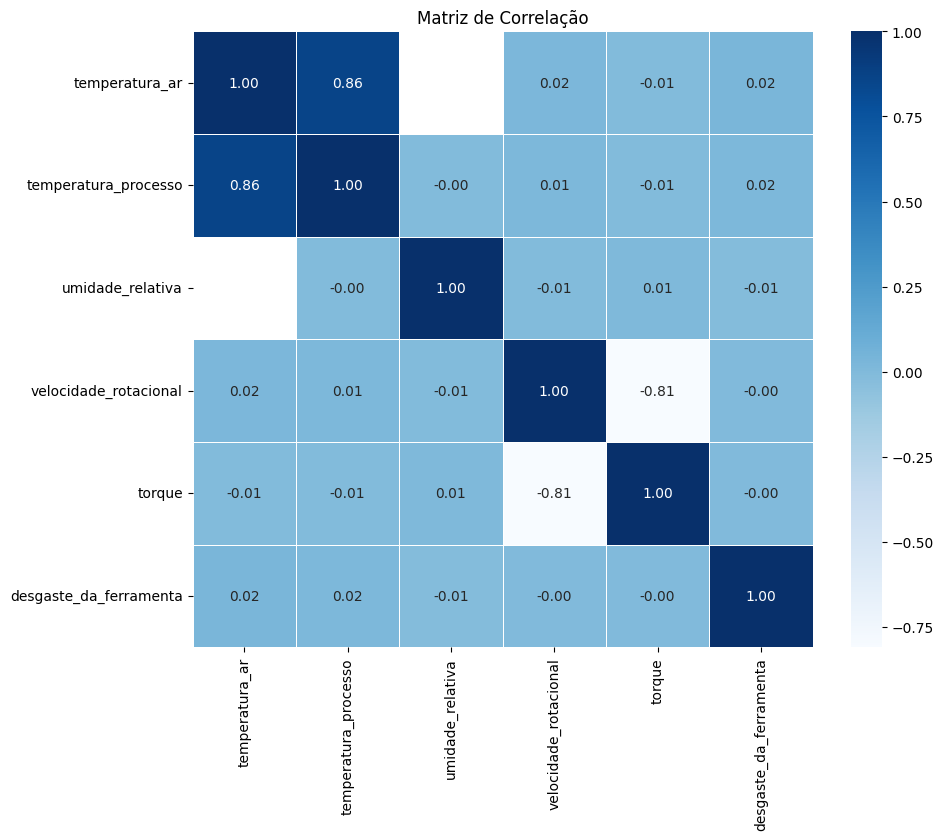

In [99]:
corr_Bootcamp = Bootcamp[Bootcamp.select_dtypes(include=["float"]).columns]  # Apenas atributos contínuos
plt.figure(figsize=(10, 8))
correlation_matrix = corr_Bootcamp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

O torque e a velocidade rotacional parecem apresentar uma relação inversa, enquanto as variáveis temperatura_ar e temperatura_processo demonstram uma correlação muito forte.

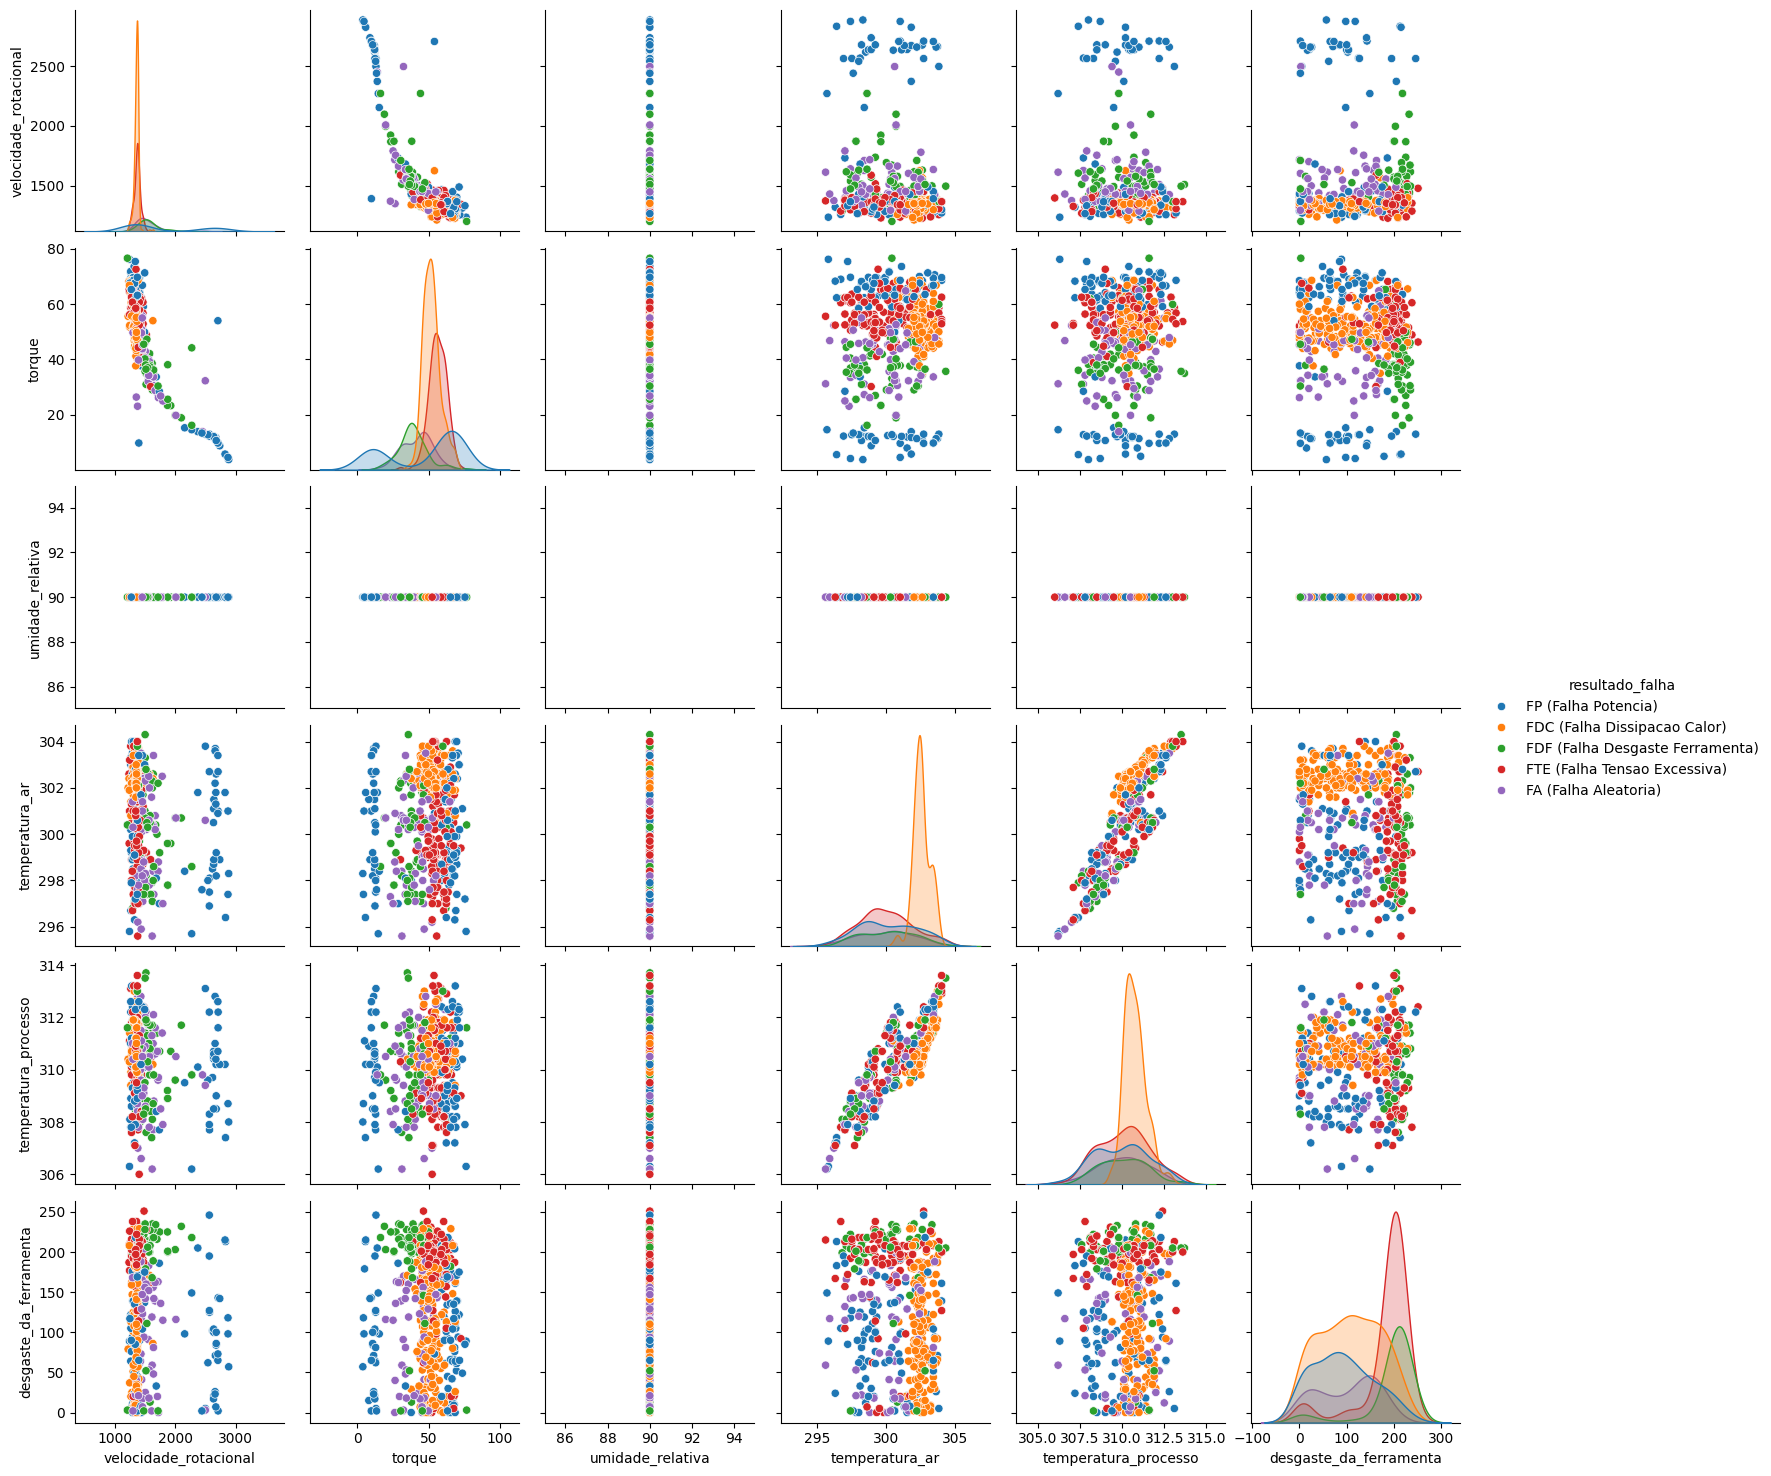

In [100]:
sns.pairplot(
    Bootcamp[Bootcamp["resultado_falha"] != "sem_falha"],
    vars=["velocidade_rotacional", "torque", "umidade_relativa", "temperatura_ar","temperatura_processo","desgaste_da_ferramenta"],
    hue="resultado_falha",
    diag_kind="kde",
    palette="tab10"
)

plt.show()

Com a confirmação das relações entre as variáveis e as falhas, avançamos para a etapa de modelagem.

##Separação teste/treino

In [81]:
from sklearn.model_selection import train_test_split

X = Bootcamp.drop("resultado_falha", axis=1)
y = Bootcamp["resultado_falha"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Tratamento de NaN, encoding e normalização dos dados

Primeiramente, a variável alvo será transformada em uma variável numérica, para facilitar o treinamento dos modelos.

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Agora, as variáveis NaN serão imputadas com o KNNImputer, depois os dados serão normalizados e a variável categórica tipo será transformada em dummies, utilizando a pipeline inbuilt do imblearn.

Dadas as condições do dataset, com valores em diferentes escalas, dados não normalmente distribuídos e presença de outliers (especialmente na velocidade, justificados mas extremamente altos), optamos por utilizar o RobustScaler da biblioteca sklearn. Esse método baseia-se na mediana e nos quartis, sendo menos sensível a outliers.

Para finalizar a parte pré-modelagem, ainda nos falta uma coisa: O balanceamento

Em análises anteriores, observou-se que há uma quantidade esmagadora de dados sem falha e muito poucos dados com falha. Existem diferentes estratégias para lidar com isso. Inicialmente, consideramos apenas o oversampling da classe minoritária (falhas), mas devido ao número reduzido de exemplos, isso não seria suficiente.

Portanto, aplicaremos a classe SMOTE do sklearn (que realiza oversampling das classes minoritárias)combinada com o algoritmo Tomek Links, responsável pelo undersampling da classe majoritária e pela limpeza dos dados, tornando as definições de erro mais claras e equilibrando melhor o dataset.

In [83]:
numeric_features = X_train.select_dtypes(include='number').columns
categorical_features = X_train.select_dtypes(include='object').columns

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=10)),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Vamos definir essa parte em uma função, pra facilitar:

In [84]:
def nvmodelo():
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  le = LabelEncoder()
  y_train = le.fit_transform(y_train)
  y_test = le.transform(y_test)
  numeric_features = X_train.select_dtypes(include='number').columns
  categorical_features = X_train.select_dtypes(include='object').columns

  numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=10)),
    ('scaler', RobustScaler())
  ])

  categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
  ])

  preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
  )

#TREINAMENTO E COMPARAÇÃO DE MODELOS

Agora, passaremos ao treinamento dos modelos. O objetivo desta etapa é testar diferentes algoritmos, a fim de identificar aquele que melhor se adapta à resolução do problema, ou seja, o modelo que apresente o melhor equilíbrio entre detectar a ocorrência de uma falha e identificar corretamente seu tipo.

Iniciaremos com o KNN, ou K-Nearest Neighbors Classifier.

## ***KNN***

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.07      0.01        15
   FDC (Falha Dissipacao Calor)       0.19      0.66      0.29        44
FDF (Falha Desgaste Ferramenta)       0.00      0.00      0.00        14
            FP (Falha Potencia)       0.11      0.61      0.19        23
   FTE (Falha Tensao Excessiva)       0.08      0.55      0.14        31
                      sem_falha       0.99      0.85      0.92      6903

                       accuracy                           0.85      7030
                      macro avg       0.23      0.46      0.26      7030
                   weighted avg       0.98      0.85      0.90      7030



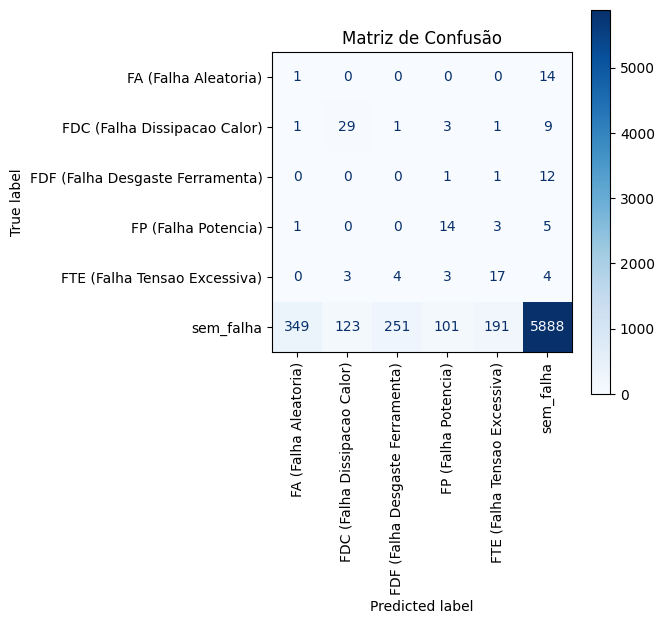

In [106]:
Kn = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ("resample", SMOTETomek(random_state=42)),
    ('classifier', KNeighborsClassifier())
])
Kn.fit(X_train, y_train)

y_pred = Kn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## ***Árvore de Decisão***

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.53      0.01        15
   FDC (Falha Dissipacao Calor)       0.14      0.64      0.23        44
FDF (Falha Desgaste Ferramenta)       0.02      0.36      0.04        14
            FP (Falha Potencia)       0.20      0.43      0.28        23
   FTE (Falha Tensao Excessiva)       0.06      0.71      0.12        31
                      sem_falha       0.99      0.59      0.74      6903

                       accuracy                           0.59      7030
                      macro avg       0.24      0.54      0.24      7030
                   weighted avg       0.98      0.59      0.73      7030



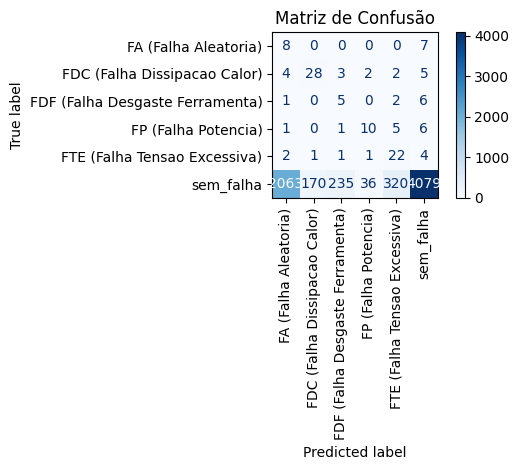

In [107]:
nvmodelo()
Tree = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ("resample", SMOTETomek(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))
])
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## ***Support Vector Machine***

Este modelo, assim como os subsequentes, possui parâmetros especializados para lidar com desbalanceamento (como é o caso do nosso dataset). Portanto, exploraremos suas características mais detalhadamente, avaliando tanto sua capacidade de balanceamento nativa quanto seu desempenho quando combinado com SMOTE ou SMOTETomek.

SMOTE

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.47      0.01        15
   FDC (Falha Dissipacao Calor)       0.11      0.75      0.19        44
FDF (Falha Desgaste Ferramenta)       0.01      0.50      0.03        14
            FP (Falha Potencia)       0.28      0.74      0.41        23
   FTE (Falha Tensao Excessiva)       0.06      0.77      0.11        31
                      sem_falha       1.00      0.56      0.72      6903

                       accuracy                           0.57      7030
                      macro avg       0.24      0.63      0.24      7030
                   weighted avg       0.98      0.57      0.71      7030



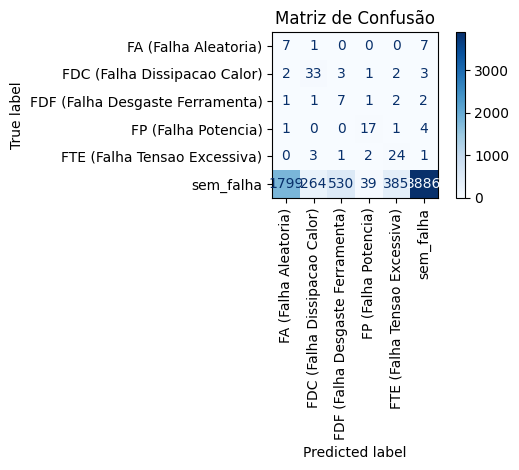

In [108]:
nvmodelo()
SVMS = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(class_weight='balanced', random_state=42))
])

SVMS.fit(X_train, y_train)
y_pred = SVMS.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

SMOTETomek

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.47      0.01        15
   FDC (Falha Dissipacao Calor)       0.11      0.75      0.19        44
FDF (Falha Desgaste Ferramenta)       0.01      0.50      0.03        14
            FP (Falha Potencia)       0.28      0.74      0.41        23
   FTE (Falha Tensao Excessiva)       0.06      0.77      0.11        31
                      sem_falha       1.00      0.56      0.72      6903

                       accuracy                           0.57      7030
                      macro avg       0.24      0.63      0.24      7030
                   weighted avg       0.98      0.57      0.71      7030



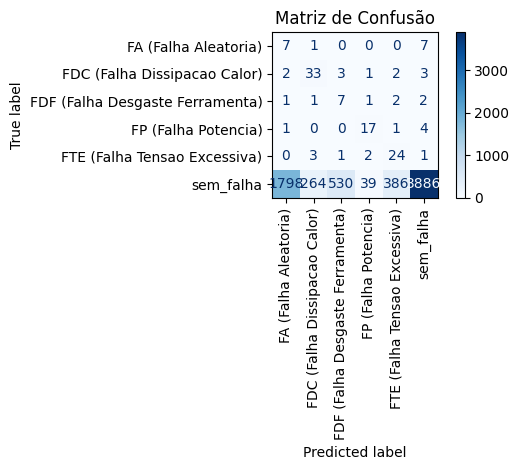

In [109]:
nvmodelo()
SVMT = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ("resample", SMOTETomek(random_state=42)),
    ('classifier', SVC(class_weight='balanced', kernel='rbf', random_state=42))
])
SVMT.fit(X_train, y_train)
y_pred = SVMT.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Só balanceamento

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.27      0.01        15
   FDC (Falha Dissipacao Calor)       0.11      0.82      0.20        44
FDF (Falha Desgaste Ferramenta)       0.01      0.43      0.02        14
            FP (Falha Potencia)       0.23      0.83      0.36        23
   FTE (Falha Tensao Excessiva)       0.05      0.71      0.09        31
                      sem_falha       1.00      0.63      0.77      6903

                       accuracy                           0.63      7030
                      macro avg       0.23      0.61      0.24      7030
                   weighted avg       0.98      0.63      0.76      7030



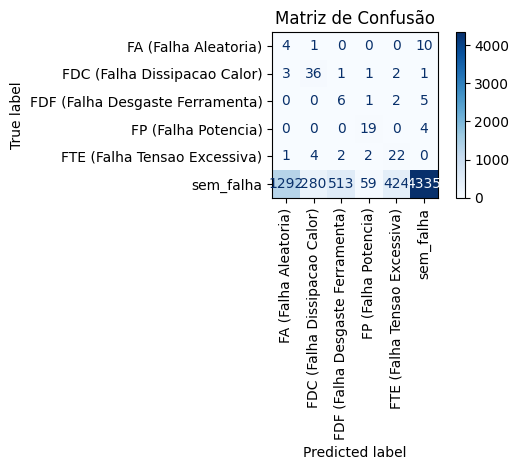

In [110]:
nvmodelo()
SVMT = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', SVC(class_weight='balanced', kernel='rbf', random_state=42))
])
SVMT.fit(X_train, y_train)
y_pred = SVMT.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## ***Ramdom Forest***

Com SMOTETomek

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.00      0.00        15
   FDC (Falha Dissipacao Calor)       0.39      0.61      0.48        44
FDF (Falha Desgaste Ferramenta)       0.00      0.00      0.00        14
            FP (Falha Potencia)       0.41      0.57      0.47        23
   FTE (Falha Tensao Excessiva)       0.20      0.52      0.29        31
                      sem_falha       0.99      0.97      0.98      6903

                       accuracy                           0.96      7030
                      macro avg       0.33      0.44      0.37      7030
                   weighted avg       0.98      0.96      0.97      7030



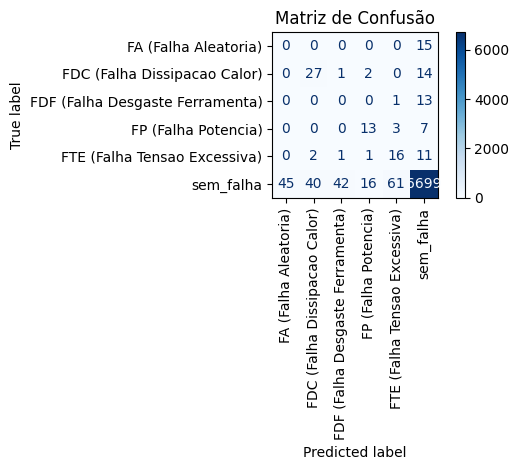

In [111]:
nvmodelo()
ForestT = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ("resample", SMOTETomek(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

ForestT.fit(X_train, y_train)
y_pred = ForestT.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Com SMOTE

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.00      0.00        15
   FDC (Falha Dissipacao Calor)       0.39      0.61      0.48        44
FDF (Falha Desgaste Ferramenta)       0.00      0.00      0.00        14
            FP (Falha Potencia)       0.33      0.52      0.41        23
   FTE (Falha Tensao Excessiva)       0.20      0.52      0.29        31
                      sem_falha       0.99      0.97      0.98      6903

                       accuracy                           0.96      7030
                      macro avg       0.32      0.44      0.36      7030
                   weighted avg       0.98      0.96      0.97      7030



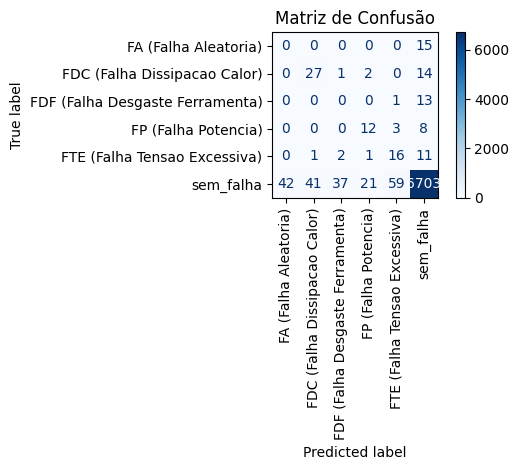

In [112]:
nvmodelo()
ForestS = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ("resample", SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])
ForestS.fit(X_train, y_train)
y_pred = ForestS.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Só com o balanceamento

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.00      0.00        15
   FDC (Falha Dissipacao Calor)       0.72      0.41      0.52        44
FDF (Falha Desgaste Ferramenta)       0.00      0.00      0.00        14
            FP (Falha Potencia)       0.56      0.39      0.46        23
   FTE (Falha Tensao Excessiva)       0.29      0.06      0.11        31
                      sem_falha       0.99      1.00      0.99      6903

                       accuracy                           0.98      7030
                      macro avg       0.43      0.31      0.35      7030
                   weighted avg       0.98      0.98      0.98      7030



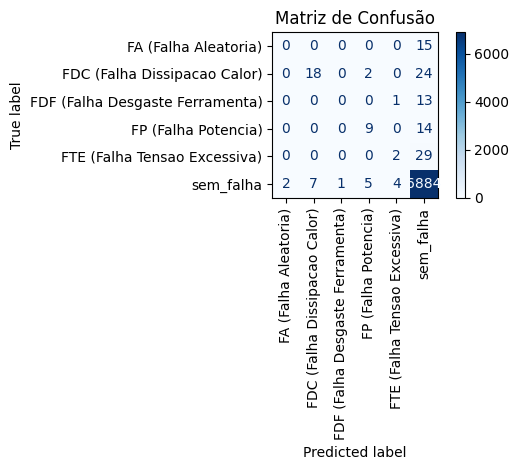

In [113]:
nvmodelo()
Forest = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])
Forest.fit(X_train, y_train)
y_pred = Forest.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## ***XGBoost***

Com SMOTETomek

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.07      0.01        15
   FDC (Falha Dissipacao Calor)       0.33      0.64      0.43        44
FDF (Falha Desgaste Ferramenta)       0.02      0.14      0.04        14
            FP (Falha Potencia)       0.34      0.74      0.47        23
   FTE (Falha Tensao Excessiva)       0.14      0.52      0.22        31
                      sem_falha       0.99      0.93      0.96      6903

                       accuracy                           0.92      7030
                      macro avg       0.30      0.51      0.35      7030
                   weighted avg       0.98      0.92      0.95      7030



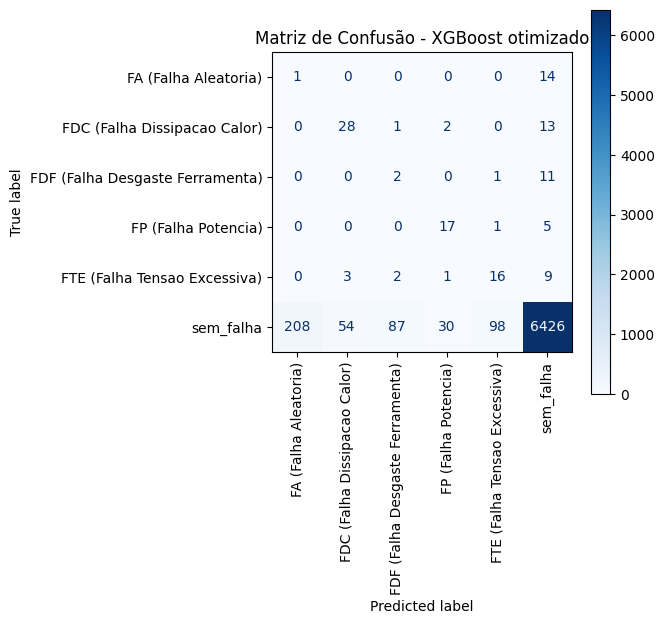

In [114]:
nvmodelo()
XGBT = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

XGBT.fit(X_train, y_train)
y_pred = XGBT.predict(X_test)


print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - XGBoost otimizado")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

SMOTE

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.07      0.01        15
   FDC (Falha Dissipacao Calor)       0.32      0.61      0.42        44
FDF (Falha Desgaste Ferramenta)       0.02      0.14      0.04        14
            FP (Falha Potencia)       0.31      0.65      0.42        23
   FTE (Falha Tensao Excessiva)       0.14      0.52      0.22        31
                      sem_falha       0.99      0.93      0.96      6903

                       accuracy                           0.92      7030
                      macro avg       0.30      0.49      0.34      7030
                   weighted avg       0.98      0.92      0.95      7030



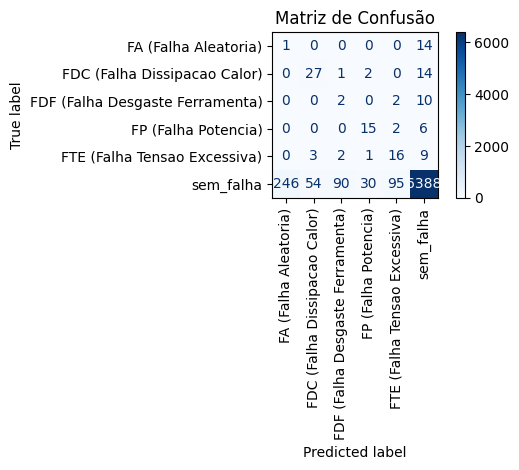

In [115]:
nvmodelo()
XGBS = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])



XGBS.fit(X_train, y_train)


y_pred = XGBS.predict(X_test)


print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Só balanceamento

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:45:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.00      0.00        15
   FDC (Falha Dissipacao Calor)       0.85      0.50      0.63        44
FDF (Falha Desgaste Ferramenta)       0.00      0.00      0.00        14
            FP (Falha Potencia)       0.53      0.35      0.42        23
   FTE (Falha Tensao Excessiva)       0.61      0.35      0.45        31
                      sem_falha       0.99      1.00      0.99      6903

                       accuracy                           0.99      7030
                      macro avg       0.50      0.37      0.42      7030
                   weighted avg       0.98      0.99      0.98      7030



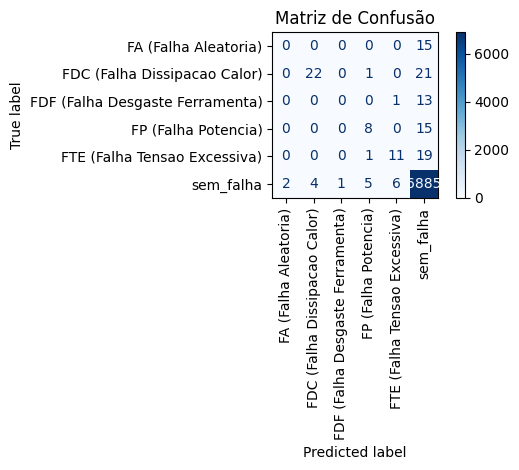

In [116]:
nvmodelo()
XGB = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])



XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## ***Linear regression***

SMOTETomek

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.33      0.01        15
   FDC (Falha Dissipacao Calor)       0.08      0.84      0.15        44
FDF (Falha Desgaste Ferramenta)       0.01      0.79      0.02        14
            FP (Falha Potencia)       0.07      0.70      0.12        23
   FTE (Falha Tensao Excessiva)       0.05      0.81      0.09        31
                      sem_falha       1.00      0.41      0.58      6903

                       accuracy                           0.41      7030
                      macro avg       0.20      0.64      0.16      7030
                   weighted avg       0.98      0.41      0.57      7030



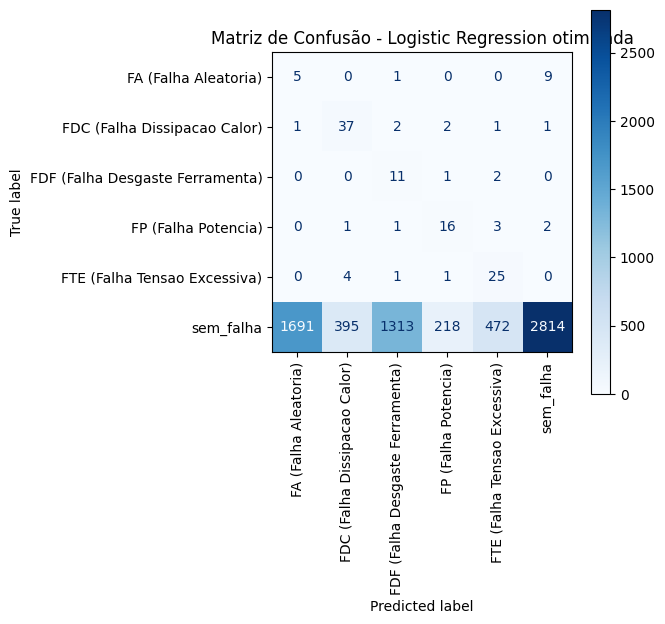

In [117]:
nvmodelo()
logregT = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('classifier', LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced', random_state=42))
])


logregT.fit(X_train, y_train)

y_pred = logregT.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression otimizada")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

SMOTE

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.33      0.01        15
   FDC (Falha Dissipacao Calor)       0.08      0.84      0.15        44
FDF (Falha Desgaste Ferramenta)       0.01      0.79      0.02        14
            FP (Falha Potencia)       0.07      0.70      0.12        23
   FTE (Falha Tensao Excessiva)       0.05      0.81      0.09        31
                      sem_falha       1.00      0.41      0.58      6903

                       accuracy                           0.41      7030
                      macro avg       0.20      0.64      0.16      7030
                   weighted avg       0.98      0.41      0.57      7030



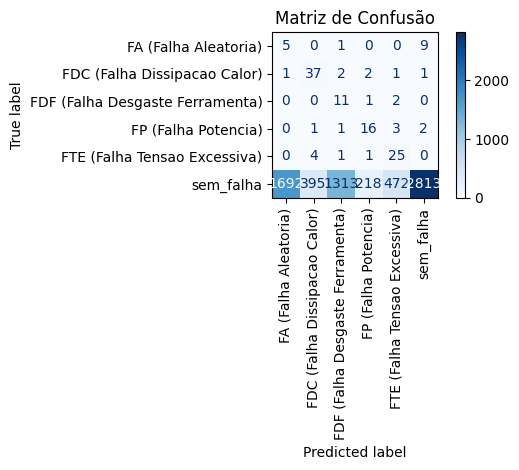

In [ ]:
nvmodelo()
logregS = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced', random_state=42))
])


logregS.fit(X_train, y_train)

y_pred = logregS.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Só balancemaento

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.27      0.00        15
   FDC (Falha Dissipacao Calor)       0.12      0.55      0.19        44
FDF (Falha Desgaste Ferramenta)       0.01      0.29      0.03        14
            FP (Falha Potencia)       0.02      0.39      0.04        23
   FTE (Falha Tensao Excessiva)       0.02      0.94      0.04        31
                      sem_falha       0.99      0.31      0.48      6903

                       accuracy                           0.32      7030
                      macro avg       0.19      0.46      0.13      7030
                   weighted avg       0.98      0.32      0.47      7030



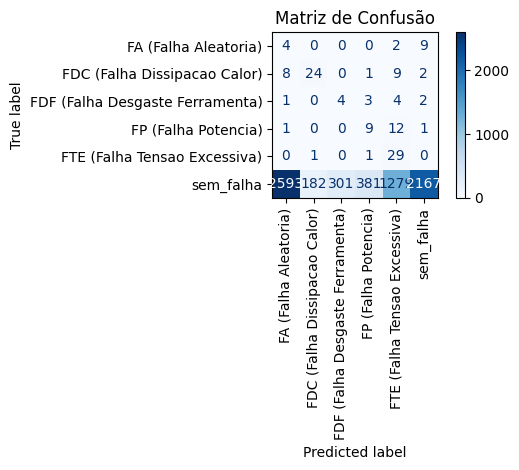

In [ ]:
nvmodelo()
logreg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier',  LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced', random_state=42))
])


logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ***Comparação e escolha***

Comparação geral dos valores:

| Modelo            | Técnica usada    | Accuracy | Macro Recall | Macro F1 |
| ----------------- | ---------------- | -------- | ------------ | -------- |
| KNN               | SMOTETomek       | 0.85     | 0.46         | 0.26     |
| Decision Tree     | SMOTETomek       | 0.59     | 0.54         | 0.24     |
| SVM               | SMOTE            | 0.57     | 0.63         | 0.24     |
| SVM               | SMOTETomek       | 0.57     | 0.63         | 0.24     |
| SVM               | Sem oversampling | 0.63     | 0.61         | 0.24     |
| Random Forest     | SMOTETomek       | 0.96     | 0.44         | 0.37     |
| Random Forest     | SMOTE            | 0.96     | 0.44         | 0.36     |
| Random Forest     | Sem oversampling | 0.98     | 0.31         | 0.35     |
| XGBoost           | SMOTETomek       | 0.92     | 0.51         | 0.35     |
| XGBoost           | SMOTE            | 0.92     | 0.49         | 0.34     |
| XGBoost           | Sem oversampling | 0.99     | 0.37         | 0.42     |
| Linear Regression | SMOTETomek       | 0.41     | 0.64         | 0.16     |
| Linear Regression | SMOTE            | 0.41     | 0.64         | 0.16     |
| Linear Regression | Sem oversampling | 0.32     | 0.46         | 0.13     |


Aparentemente, em termos de detecção de falhas, os modelos **Logistic Regression combinados com SMOTETomek e SMOTE** apresentam melhor desempenho, com macro recall = 0,64. O **SVM com SMOTE/SMOTETomek** vem logo atrás, com macro recall = 0,63.

O **XGBoost sem oversampling** apresenta a melhor performance em não classificar falsos positivos (accuracy = 0,98), embora seu macro recall seja inferior.

O modelo mais estável até o momento é o **XGBoost com SMOTETomek**.

Na próxima etapa, analisaremos estratégias para melhorar ainda mais essas previsões.

Por questões de tempo e custo computacional, manteremos os parâmetros atuais (sem ajuste de hiperparâmetros) e tentaremos combinar o Logistic Regression (com SMOTETomek) com o XGBoost (sem balanceamento), a fim de avaliar se essa combinação apresenta desempenho superior ao XGBoost com SMOTETomek. Caso contrário, considerando performance e balanceamento, o XGBoost com SMOTETomek será mantido como o modelo mais apropriado.

Para tentar organizar um modelo que tenha falsos positivos redusidos mas ainda preveja as falhas, usaremos o Ensemble (soft)

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.00      0.00        15
   FDC (Falha Dissipacao Calor)       0.55      0.59      0.57        44
FDF (Falha Desgaste Ferramenta)       0.00      0.00      0.00        14
            FP (Falha Potencia)       0.42      0.48      0.45        23
   FTE (Falha Tensao Excessiva)       0.48      0.45      0.47        31
                      sem_falha       0.99      0.99      0.99      6903

                       accuracy                           0.98      7030
                      macro avg       0.41      0.42      0.41      7030
                   weighted avg       0.98      0.98      0.98      7030



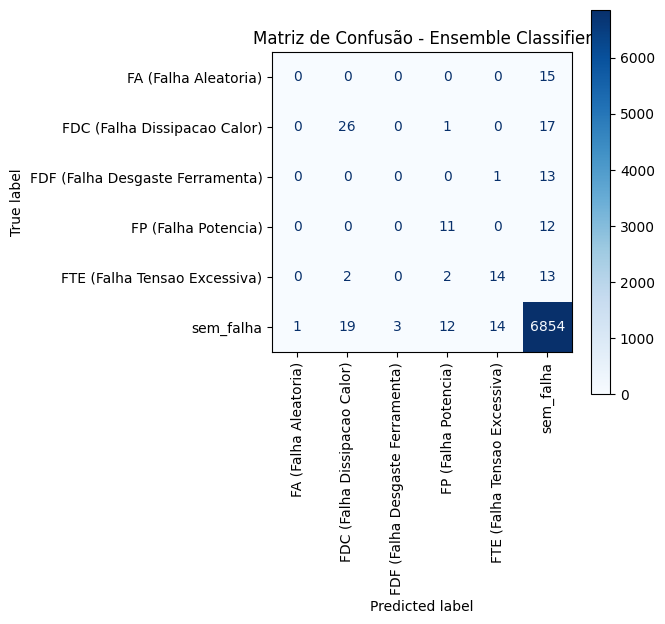

In [97]:
nvmodelo()
lr_balanced = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('classifier', LogisticRegression(
        solver='saga',
        max_iter=5000,
        class_weight='balanced',
        random_state=42
    ))
])

xgb_plain = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

ensemble1 = VotingClassifier(
    estimators=[
        ('lr_bal', lr_balanced),
        ('xgb_plain', xgb_plain)
    ],
    voting='soft',
    n_jobs=-1
)

ensemble1.fit(X_train, y_train)

y_pred = ensemble1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Ensemble Classifier")

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


Acurácias da Validação Cruzada: [0.98307255 0.98307255 0.98093883 0.97908962 0.98136558]
Acurácia Média CV: 0.9815
Desvio Padrão CV: 0.0015


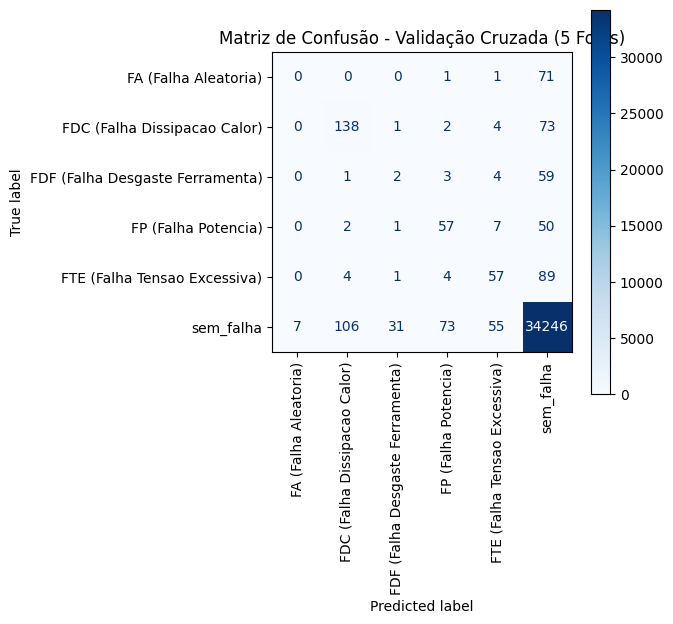

In [98]:
cv_scores = cross_val_score(ensemble1, X, y, cv=5, scoring='accuracy')

print(f"\nAcurácias da Validação Cruzada: {cv_scores}")
print(f"Acurácia Média CV: {np.mean(cv_scores):.4f}")
print(f"Desvio Padrão CV: {np.std(cv_scores):.4f}")
y_encoded = le.fit_transform(y)
y_pred = cross_val_predict(ensemble1, X, y_encoded, cv=5)

cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Validação Cruzada (5 Folds)")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Considerando o balanceamento, 0.92 0.51 0.35(XGBoost+ SMOTETomek) vs 0.98 0.42 0.41 desse Ensemble.

Esse Ensemble parece ser mais balanceado, mas, podemos tentar balancear ainda mais, trazendo o SVM+SMOTETomek, que possuia um recall de 0.63.

                                 precision    recall  f1-score   support

           FA (Falha Aleatoria)       0.00      0.00      0.00        15
   FDC (Falha Dissipacao Calor)       0.23      0.75      0.35        44
FDF (Falha Desgaste Ferramenta)       0.02      0.36      0.04        14
            FP (Falha Potencia)       0.29      0.65      0.41        23
   FTE (Falha Tensao Excessiva)       0.14      0.71      0.24        31
                      sem_falha       0.99      0.93      0.96      6903

                       accuracy                           0.92      7030
                      macro avg       0.28      0.57      0.33      7030
                   weighted avg       0.98      0.92      0.95      7030



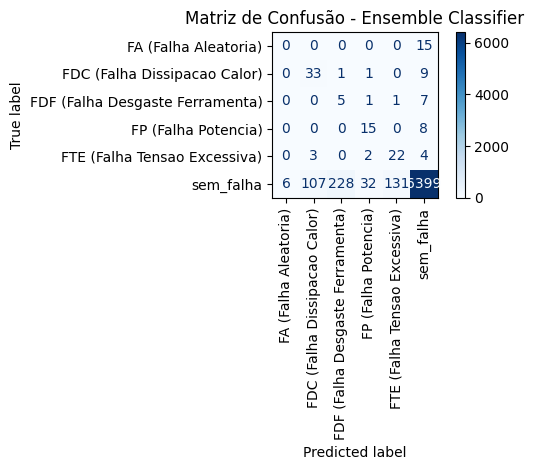

In [90]:
nvmodelo()
lr_balanced = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('classifier', LogisticRegression(
        solver='saga',
        max_iter=5000,
        class_weight='balanced',
        random_state=42
    ))
])

xgb_plain = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

svm_balanced = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('classifier', SVC(
        probability=True,
        class_weight='balanced',
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42
    ))
])


ensemble = VotingClassifier(
    estimators=[
        ('lr_bal', lr_balanced),
        ('xgb_plain', xgb_plain),
        ('svm_bal', svm_balanced)
    ],
    voting='soft',
    n_jobs=-1
)

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Ensemble Classifier")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.show()


Acurácias da Validação Cruzada: [0.98307255 0.98307255 0.98093883 0.97908962 0.98136558]
Acurácia Média CV: 0.9815
Desvio Padrão CV: 0.0015


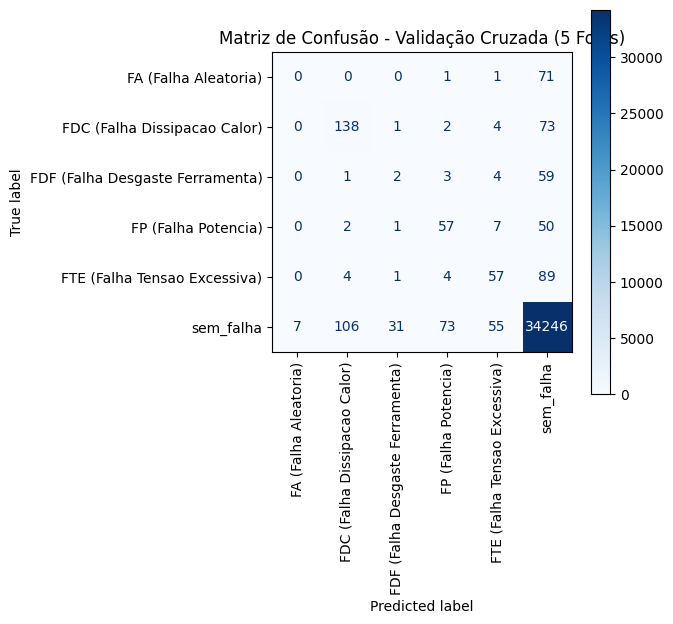

In [94]:
cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')

print(f"\nAcurácias da Validação Cruzada: {cv_scores}")
print(f"Acurácia Média CV: {np.mean(cv_scores):.4f}")
print(f"Desvio Padrão CV: {np.std(cv_scores):.4f}")
y_encoded = le.fit_transform(y)
y_pred = cross_val_predict(ensemble, X, y_encoded, cv=5)

cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Validação Cruzada (5 Folds)")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Em questão de crossvalidation, os dois tiveram performance similar.
O segundo ensemble com **(SVM)** é consideravelmente mais custoso. Então, o modelo de melhor performance termina sendo o ensemble com **Logistic Regression (com SMOTETomek) e o XGBoost (sem balanceamento)**

# **Considerações e Pontos de Melhoria**



*   Considerando a distribuição dos dados e a dificuldade do modelo em identificar corretamente as classes, poderiam ser aplicadas outras técnicas de feature engineering para destacar melhor as diferenças entre elas.
*   Neste projeto, foram utilizados SMOTETomek e SMOTE, mas existem diversos outros algoritmos de balanceamento que também poderiam ser explorados.

*   Além disso, o ajuste de hiperparâmetros constitui uma opção válida para o refinamento e a melhoria do desempenho dos modelos.

*   Disponibilização para uso de API dentro do notebook

*   Melhora na coleta de dados e observação de dados aleatórios







#Teste

In [ ]:
Bootcamp_teste = pd.read_csv('bootcamp_test.csv', sep=',')
y = Bootcamp_teste
y_pred_new = ensemble1_pipe.predict(X_new)
new_data['predicted_class'] = y_pred_new